# **CAPSTONE PROJECT: RAIN PREDICTION IN AUSTRALIA**
-----

## **Table of Content**
---
1. Library
2. Dataset
    * Get Dataset
    * Dataset Description
    * Dataset Objectives
    * Dataset Information
    * Features Information
3. Data Preparation
    * Change `Date` feature into DateTime
    * Create new features from `Date` feature (`Day, Month, Year`)
    * Change `Month` feature into Categorical
4. Split Dataset into Train/Val/Test (60%/20%/20%)
5. Exploratory Data Analysis (EDA)
    * Get Numerical and Categorical Features
    * Explore Categorical and Numerical features
    * Check missing value
    * Check outliers in Numerical feature
    * Australia rain season
    * Explore Target (`RainTomorrow`) feature
6. Feature Engineering
    * Deals with missing value
    * Deals with Outliers
7. Feature Importances
    * Mutual Info Score for Categorical features
    * Correlation Matrix and Heatmap for Numerical features
8. Declare Features for Capstone Project
9. OHE with DictVectorizer()
10. Machine Learning Model
    * `LogisticRegression()`
    * `DecisionTreeClassifier()`
    * `RandomForestClassifier()`
    * `XGBoost()`
11. Train the best and final model

## **Libary**
---

In [347]:
import pandas as pd
import numpy as np
 
import seaborn as sns
from matplotlib import pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier

from math import ceil

import xgboost as xgb

## **Dataset**
---
### Get Dataset

In [348]:
data_path = 'C:/Users/Aditya Rafi/Desktop/Dataset/capstone-project/'
data = data_path+'weatherAUS.csv'

df = pd.read_csv(data)
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [349]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

### Data Description
This dataset contains about 10 years of daily weather observations from numerous Australian weather stations. 
### Dataset Objectives
Did it rain the next day? Yes or No

### Dataset Information

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [351]:
df.shape

(145460, 23)

### Features Information
| No. | Feature | Type | Information     |
| --- | --- | --- | --- |
| 1 | Date | Categorical | The date of observation (01-11-2007 to 25-06-2017) |
| 2 | Location | Categorical | The common name of the location of the weather station in Australia |
| 3 | MinTemp | Numerical | Min. Temperature (degrees C) |
| 4 | MaxTemp | Numerical | Max. Temperature (degrees C) |
| 5 | Rainfall | Numerical | The amount of rainfall recorded for the day in mm |
| 6 | Evaporation | Numerical | The so-called Class A pan evaporation (mm) in the 24 hours to 9am |
| 7 | Sunshine | Numerical | The number of hours of bright sunshine in the day |
| 8 | WindGustDir | Categorical | The direction of the strongest wind gust in the 24 hours to midnight |
| 9 | WindGustSpeed | Numerical | The speed (km/h) of the strongest wind gust in the 24 hours to midnight |
| 10 | WindDir9am | Categorical | Direction of the wind at 9am |
| 11 | WindDir3pm | Categorical | Direction of the wind at 3pm |
| 12 | WindSpeed9am | Numerical | Wind speed (km/hr) averaged over 10 minutes prior to 9am |
| 13 | WindSpeed3pm | Numerical | Wind speed (km/hr) averaged over 10 minutes prior to 3pm |
| 14 | Humidity9am | Numerical | Humidity (%) at 9am | 
| 15 | Humidity3pm | Numerical | Humidity (%) at 3pm |
| 16 | Pressure9am | Numerical | Atmospheric pressure (hpa) reduced to mean sea level at 9am |
| 17 | Pressure3pm | Numerical | Atmospheric pressure (hpa) reduced to mean sea level at 3pm |
| 18 | Cloud9am | Numerical | Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many |
| 19 | Cloud3pm | Numerical | Fraction of sky obscured by cloud at 3pm. This is measured in "oktas", which are a unit of eigths. It records how many |
| 20 | Temp9am | Numerical | Temperature (degrees C) at 9am |
| 21 | Temp3pm | Numerical | Temperature (degrees C) at 3pm |
| 22 | RainToday | Categorical | Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0 |
| 23 | RainTomorrow | Categorical | The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk" |

## **Data Preparation**
---
### Change `Date` feature into DateTime

In [352]:
df['Date'] = pd.to_datetime(df['Date'])

### Create new features from `Date` feature (`Day, Month, Year`)

In [353]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


### Change `Month` feature into Categorical

In [354]:
month_values = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'Desember'
}
df.Month = df.Month.map(month_values) 

df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,Desember,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,Desember,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,Desember,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,Desember,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,Desember,5


## **Split Dataset into Train/Val/Test (60%/20%/20%)**
---
Because this data contains time series, the split process by `Date` not randomly. For the code source for this spliting process you can see in [here](https://newbedev.com/splitting-data-using-time-based-splitting-in-test-and-train-datasets).

In [355]:
def train_test_split_dates_sorted(df, test_size, dates):
    n_test = ceil(test_size * len(df))

    sorted_index = [x for _, x in sorted(zip(np.array(dates), np.arange(0, len(dates))), key=lambda pair: pair[0])]
    train_idx = sorted_index[:-n_test]
    test_idx = sorted_index[-n_test:]

    if isinstance(df, (pd.Series, pd.DataFrame)):
        df_train = df.iloc[train_idx]
        df_test = df.iloc[test_idx]
    else:
        df_train = df[train_idx]
        df_test = df[test_idx]

    return df_train, df_test  

In [356]:
df_full_train, df_test = train_test_split_dates_sorted(df, 0.2, df['Date'])
df_train, df_val = train_test_split_dates_sorted(df_full_train, 0.25, df_full_train['Date'])

print('Train Full:', len(df_full_train), 
      '(', round((len(df_full_train)/len(df))*100, 2), '%)') 
print('Train:', len(df_train), 
      '(', round((len(df_train)/len(df))*100, 2), '%)') 
print('Validation:', len(df_val), 
      '(', round((len(df_val)/len(df))*100, 2), '%)') 
print('Test:', len(df_test), 
      '(', round((len(df_test)/len(df))*100, 2), '%)') 

Train Full: 116368 ( 80.0 %)
Train: 87276 ( 60.0 %)
Validation: 29092 ( 20.0 %)
Test: 29092 ( 20.0 %)


In [357]:
df_full_train['Date'].tail(5)

26573   2015-11-10
29582   2015-11-10
32926   2015-11-10
35935   2015-11-10
38944   2015-11-10
Name: Date, dtype: datetime64[ns]

In [358]:
df_test['Date'].head(5)

41953   2015-11-10
44993   2015-11-10
48429   2015-11-10
51468   2015-11-10
54508   2015-11-10
Name: Date, dtype: datetime64[ns]

In [359]:
df_train['Date'].tail(5)

69205   2014-03-26
72214   2014-03-26
73792   2014-03-26
76801   2014-03-26
79810   2014-03-26
Name: Date, dtype: datetime64[ns]

In [360]:
df_val['Date'].head(5)

82819   2014-03-26
86012   2014-03-26
89052   2014-03-26
92092   2014-03-26
95132   2014-03-26
Name: Date, dtype: datetime64[ns]

After the split the `Date` columns can be dropped because that columns will not be used again in further processes.

In [361]:
for df1 in [df_full_train, df_train, df_val, df_test]:
    df1.drop('Date', axis=1, inplace = True)

C:\Users\Aditya Rafi\anaconda3\envs\myenv\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## **Exploratory Data Analysis (EDA)**
---
### Get Numerical and Categorical Features

In [362]:
def get_cat_num_feat(df):
    categorical = [col for col in df.columns if df[col].dtype=='O']
    numerical = [col for col in df.columns if df[col].dtype!='O']
    
    return categorical, numerical

In [363]:
categorical, numerical = get_cat_num_feat(df_full_train)

print(f'There are {len(categorical)} categorical features')
print('The categorical features are :', categorical)

print('')

print(f'There are {len(numerical)} numerical features')
print('The numerical features are :', numerical)

There are 7 categorical features
The categorical features are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow', 'Month']

There are 18 numerical features
The numerical features are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Day']


### Explore Categorical and Numerical features

> Unique values from categorical features in this Dataset

In [364]:
df_full_train[categorical].nunique()

Location        49
WindGustDir     16
WindDir9am      16
WindDir3pm      16
RainToday        2
RainTomorrow     2
Month           12
dtype: int64

> Most frequent values in the categorical features
>> **Note**: There are 2 rows with the second rows containing NaN values because there are still missing value in the dataset

In [365]:
df_full_train[categorical].mode()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Month
0,Canberra,W,N,SE,No,No,August
1,NaN,NaN,NaN,NaN,NaN,NaN,October


> Numerical feature information

In [366]:
df_full_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Day
count,115281.000000,115486.000000,113761.000000,70423.000000,66259.000000,107883.00000,114800.000000,114604.000000,114251.000000,114035.000000,104492.000000,104526.000000,73231.000000,71918.000000,114924.000000,114748.000000,116368.000000,116368.000000
mean,11.947509,22.944056,2.356152,5.292715,7.574056,40.11265,14.070810,18.702873,68.860719,51.589109,1017.805215,1015.415768,4.339706,4.437165,16.753737,21.465707,2011.909872,15.697417
std,6.361796,7.033855,8.505869,3.984172,3.776167,13.64740,8.980518,8.862094,19.027553,20.725980,7.134634,7.061021,2.877793,2.703681,6.432802,6.870628,2.065886,8.814573
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,6.00000,0.000000,0.000000,0.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-6.200000,-5.100000,2007.000000,1.000000
25%,7.400000,17.800000,0.000000,2.600000,4.800000,31.00000,7.000000,13.000000,57.000000,37.000000,1013.100000,1010.600000,1.000000,2.000000,12.100000,16.500000,2010.000000,8.000000
50%,11.700000,22.300000,0.000000,4.600000,8.400000,39.00000,13.000000,19.000000,70.000000,52.000000,1017.800000,1015.400000,5.000000,5.000000,16.500000,20.800000,2012.000000,16.000000
75%,16.600000,27.900000,0.800000,7.200000,10.600000,48.00000,19.000000,24.000000,83.000000,66.000000,1022.600000,1020.200000,7.000000,7.000000,21.300000,26.100000,2014.000000,23.000000
max,33.900000,48.100000,371.000000,82.400000,14.300000,135.00000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.100000,2015.000000,31.000000


From the information above it is suspected that there are outliers in some features.

> Numerical feature distribution visualization

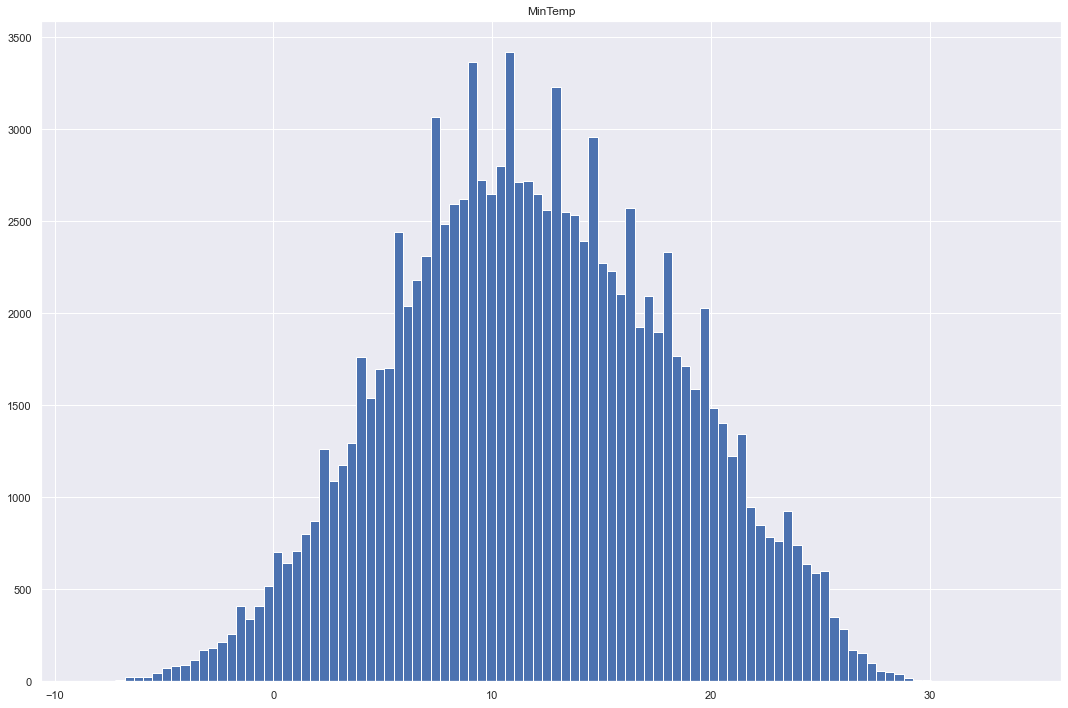

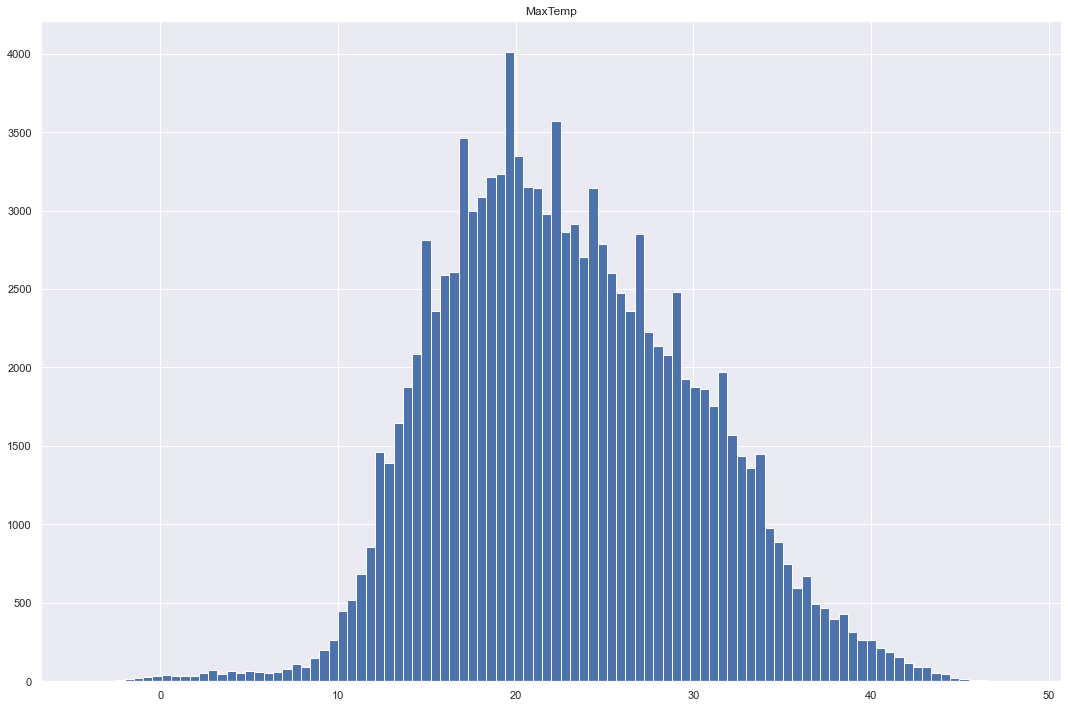

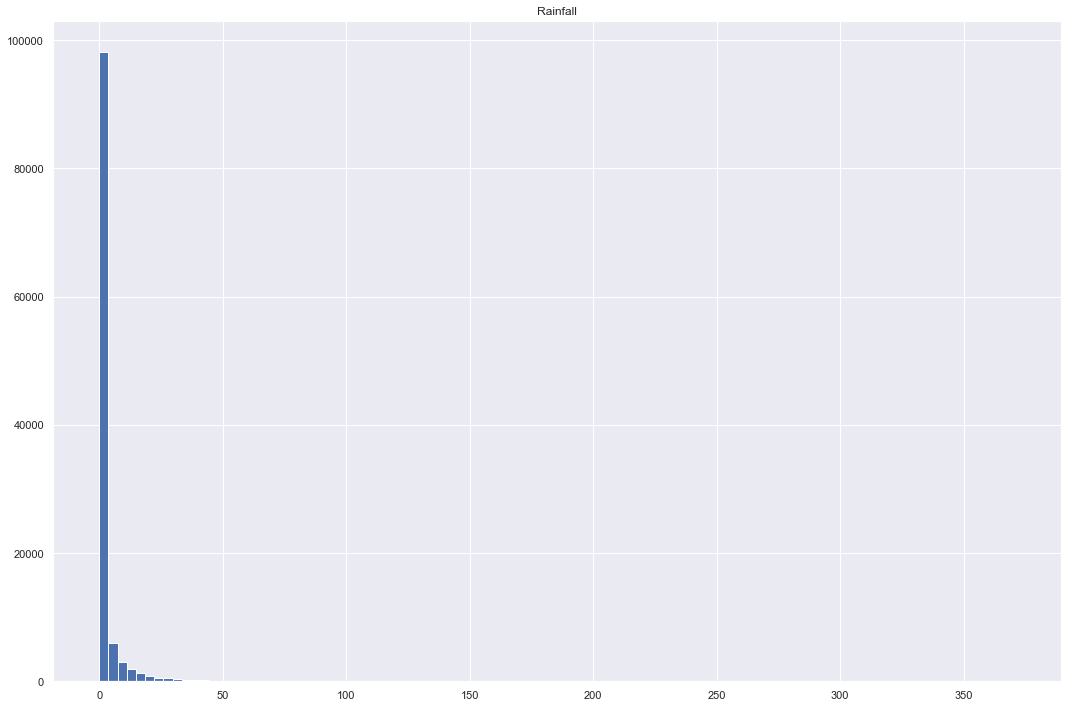

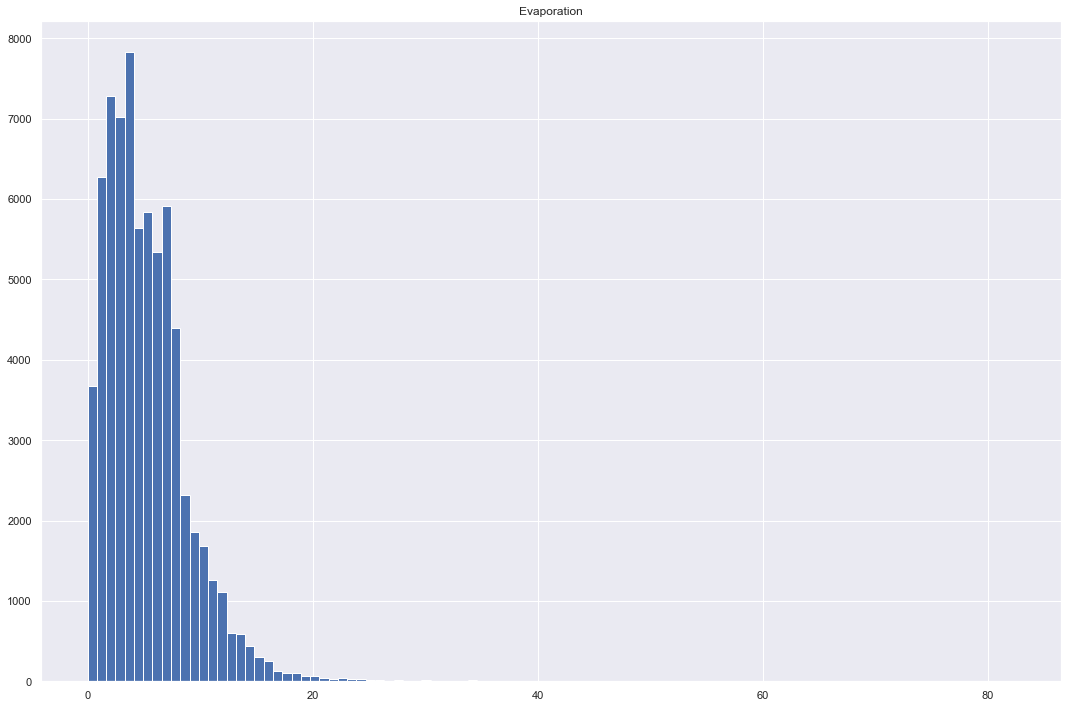

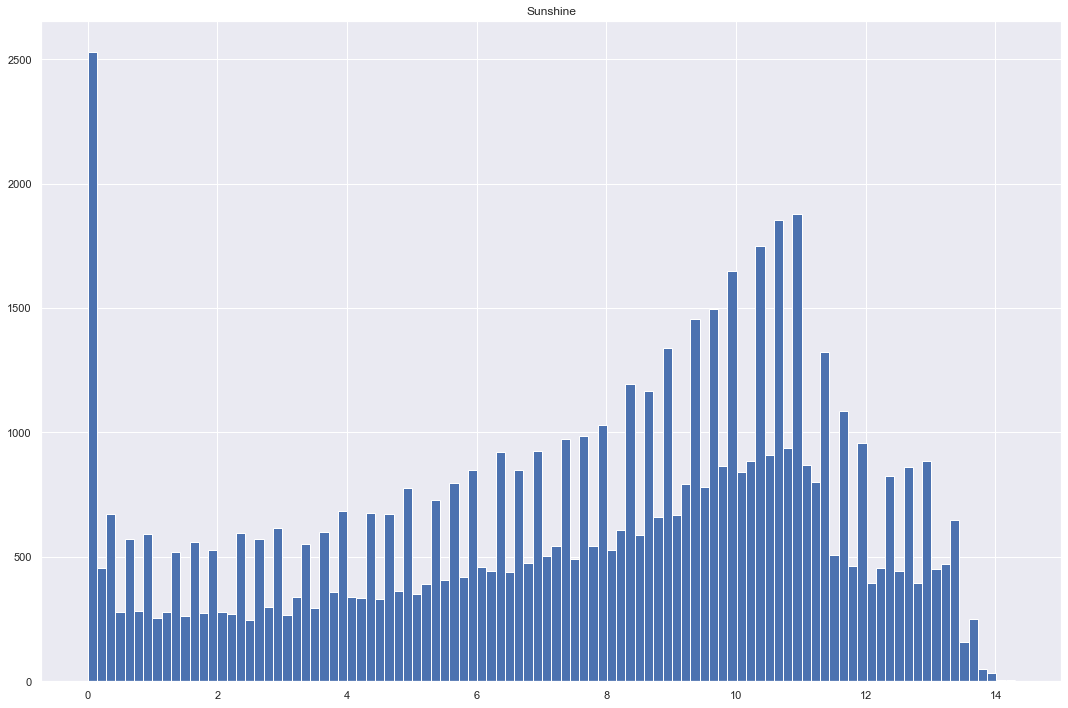

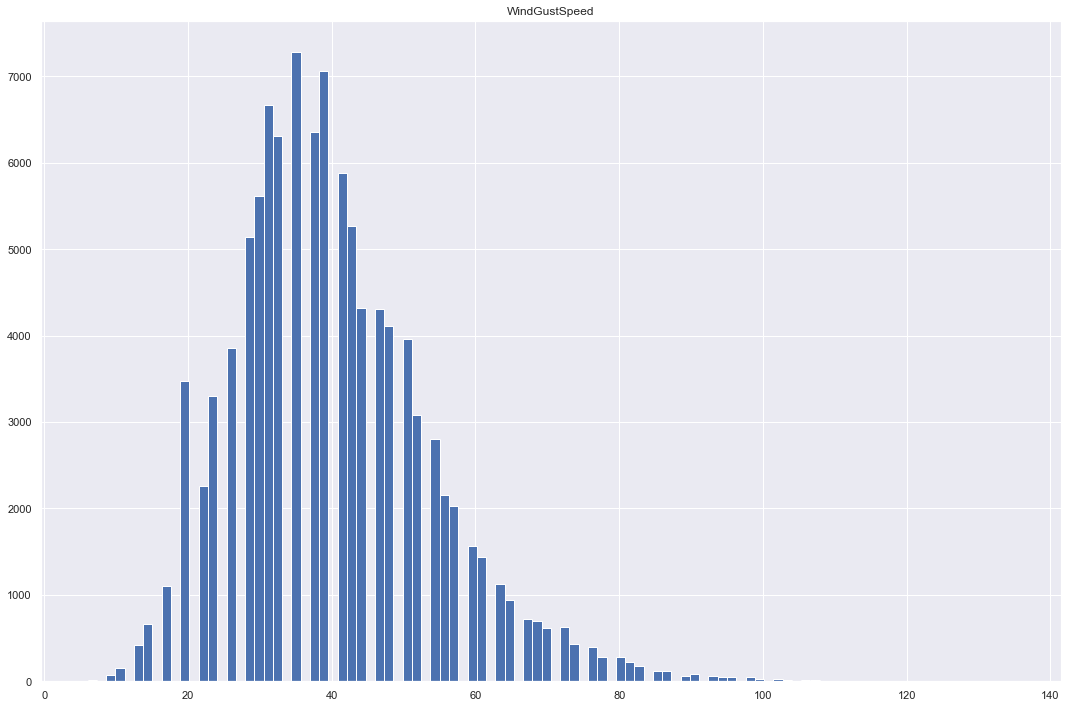

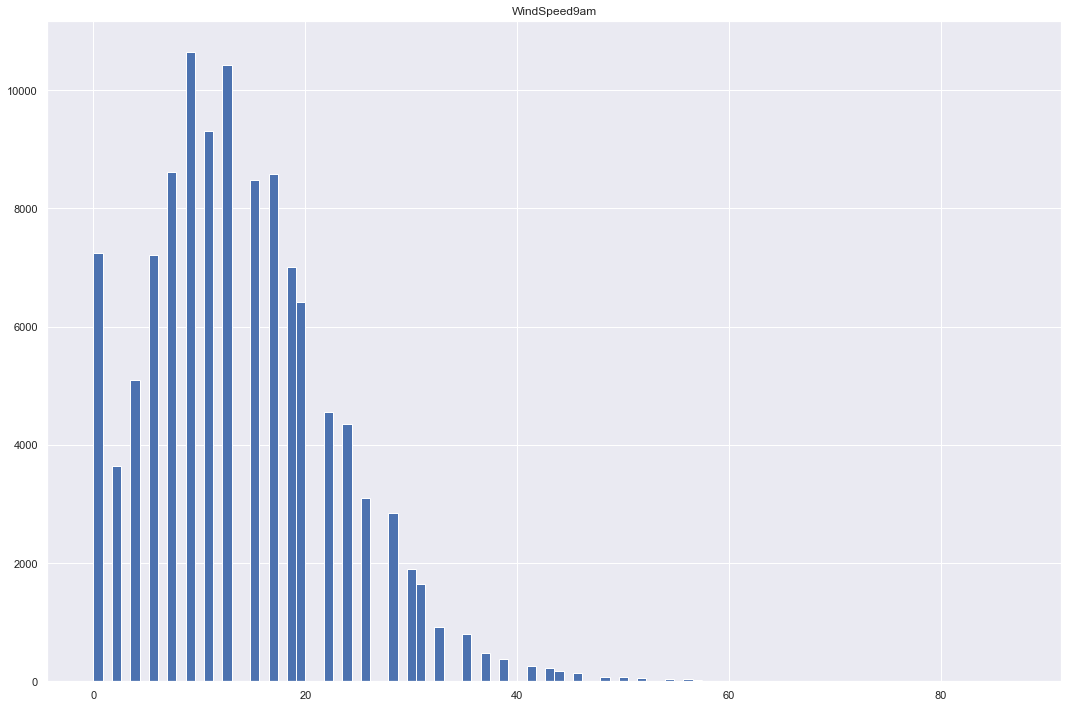

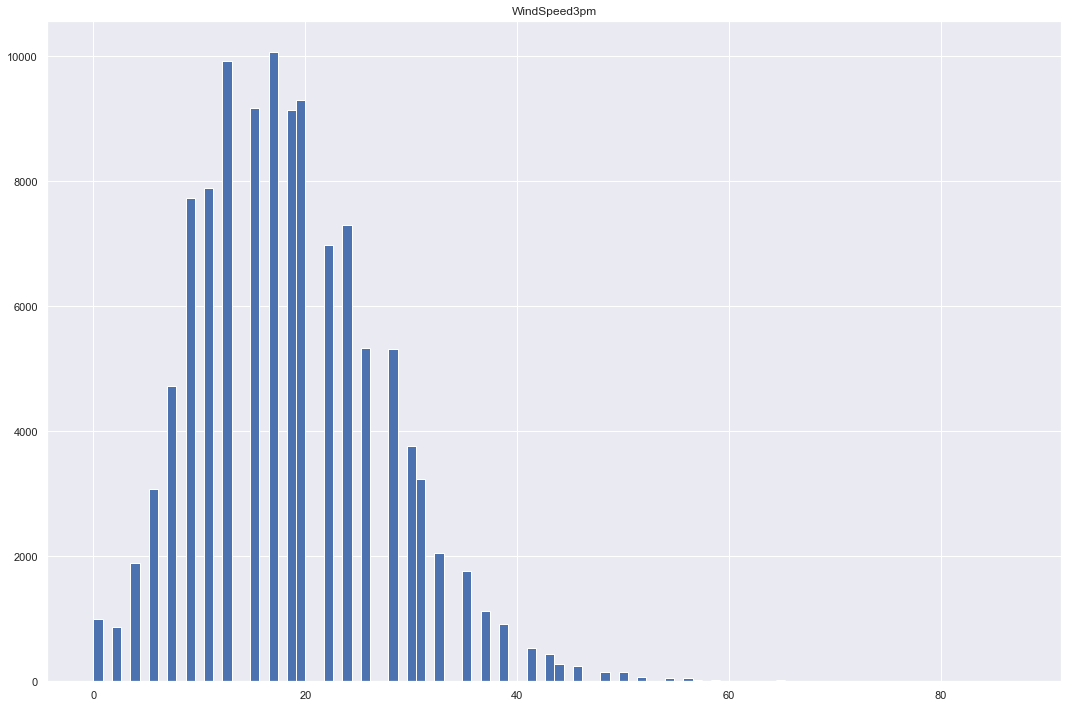

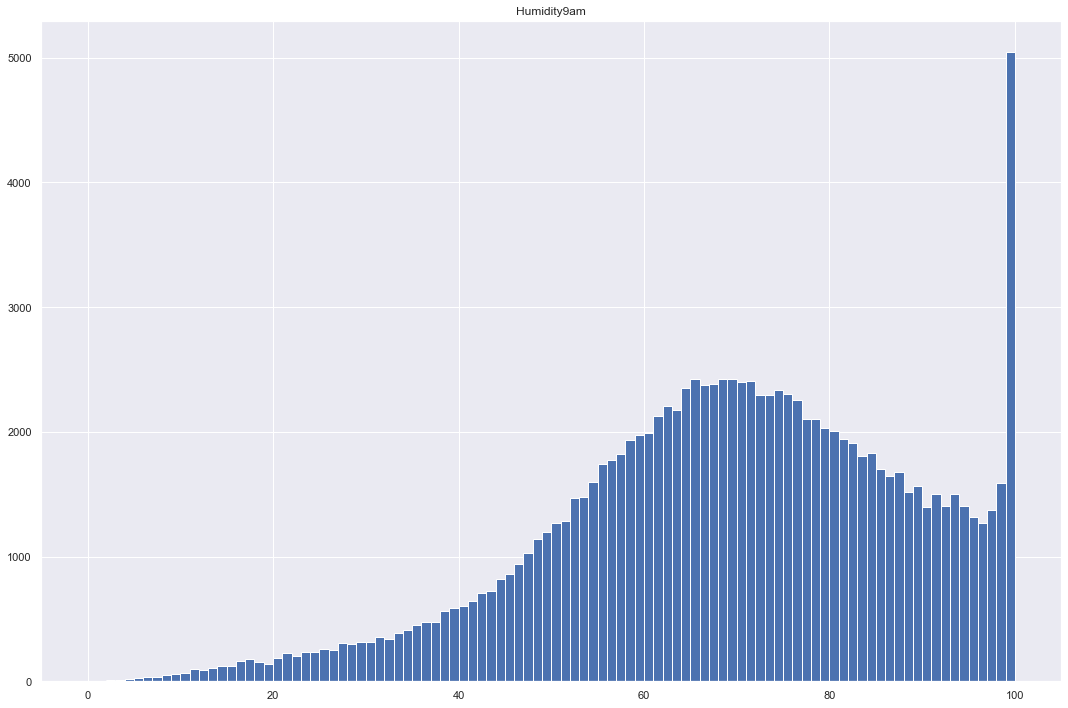

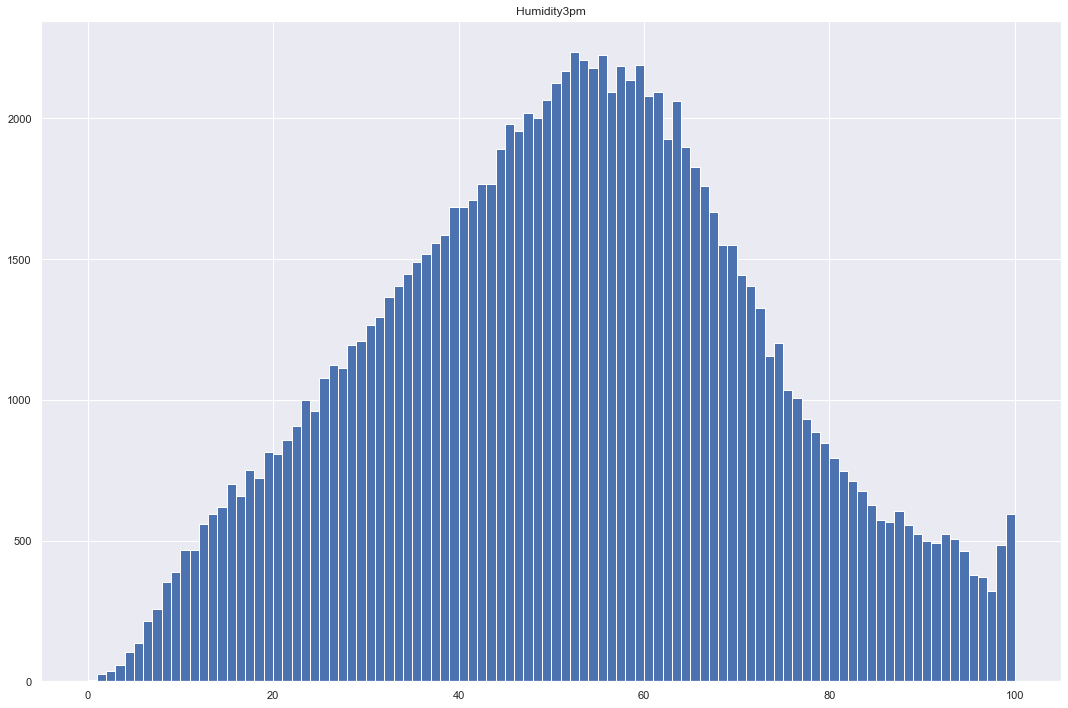

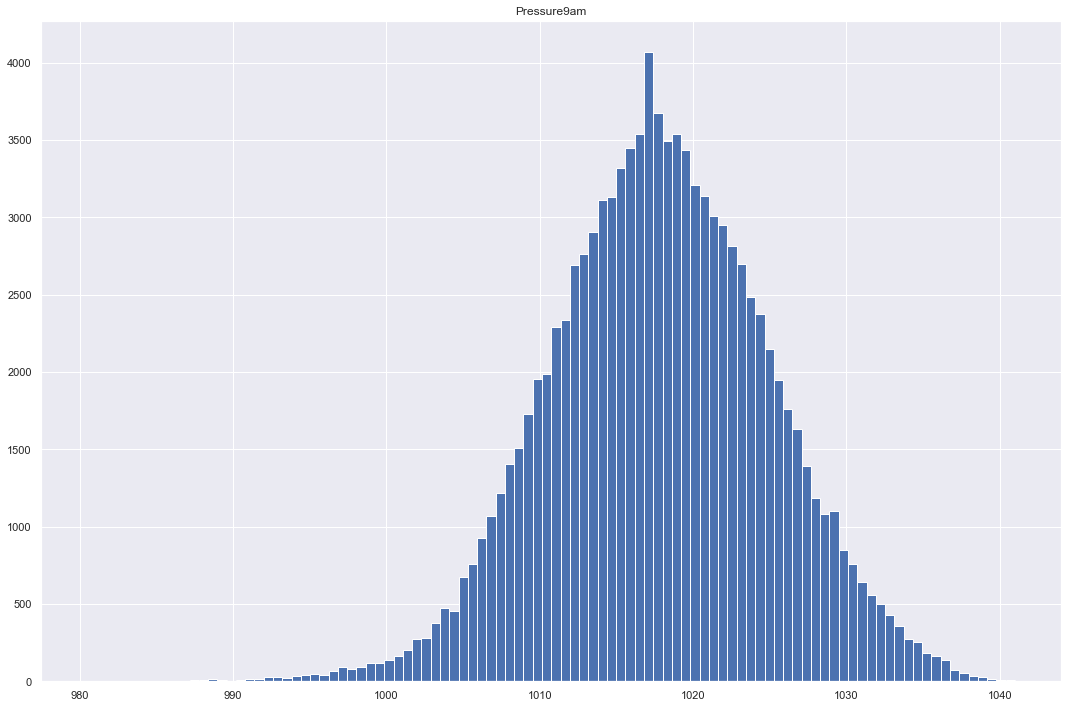

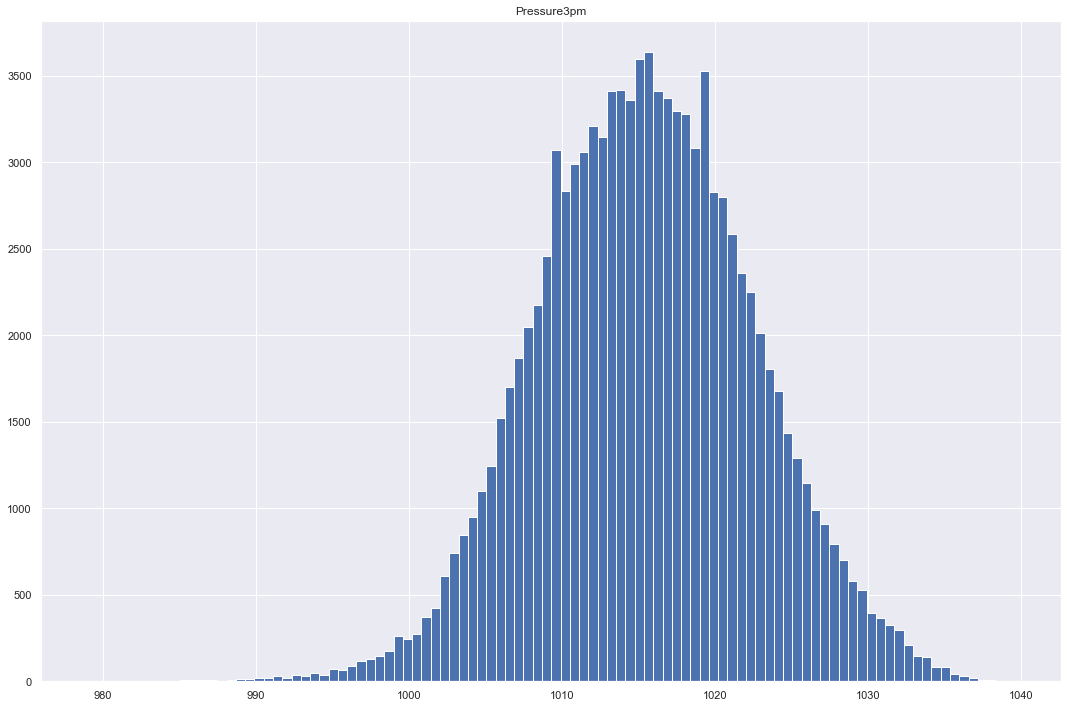

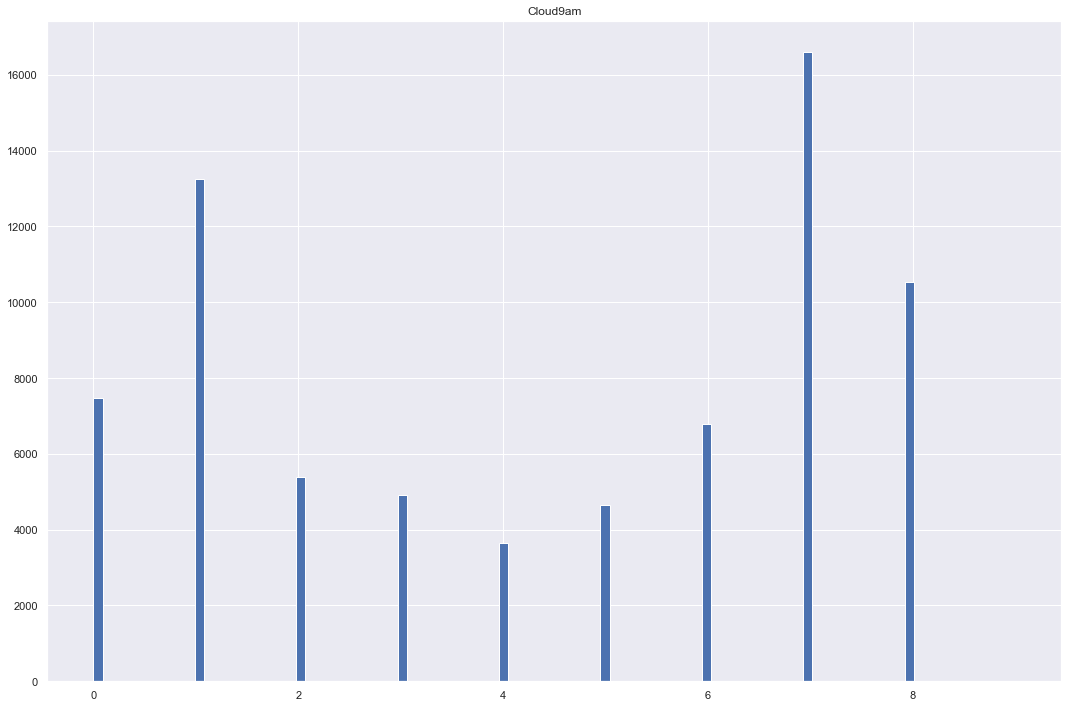

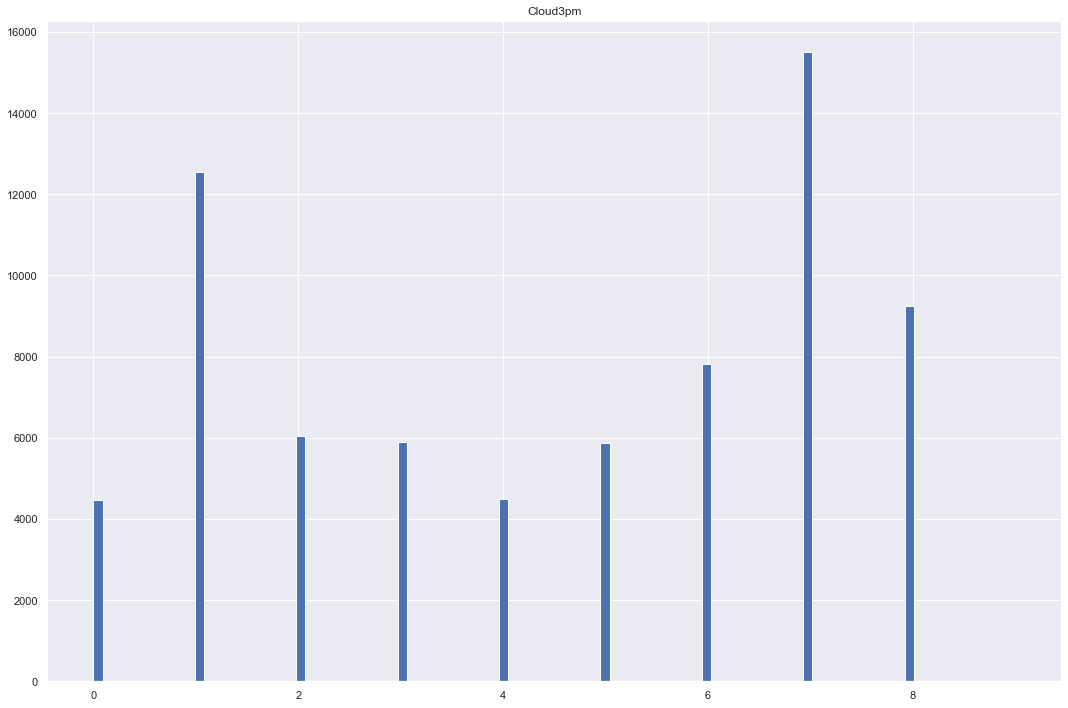

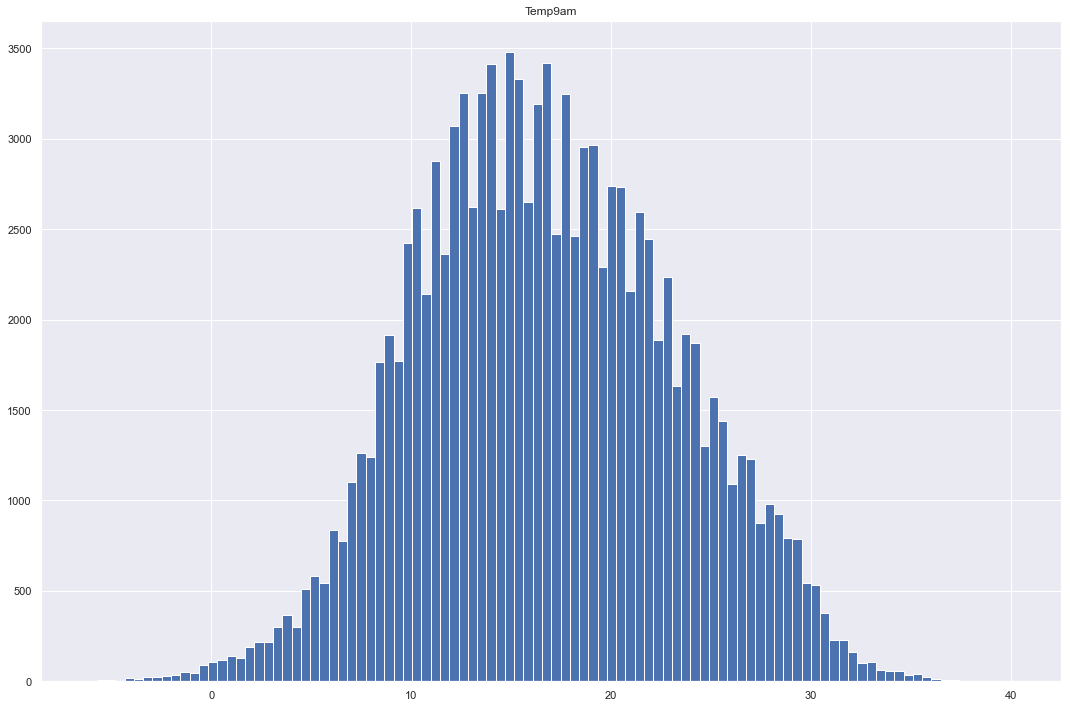

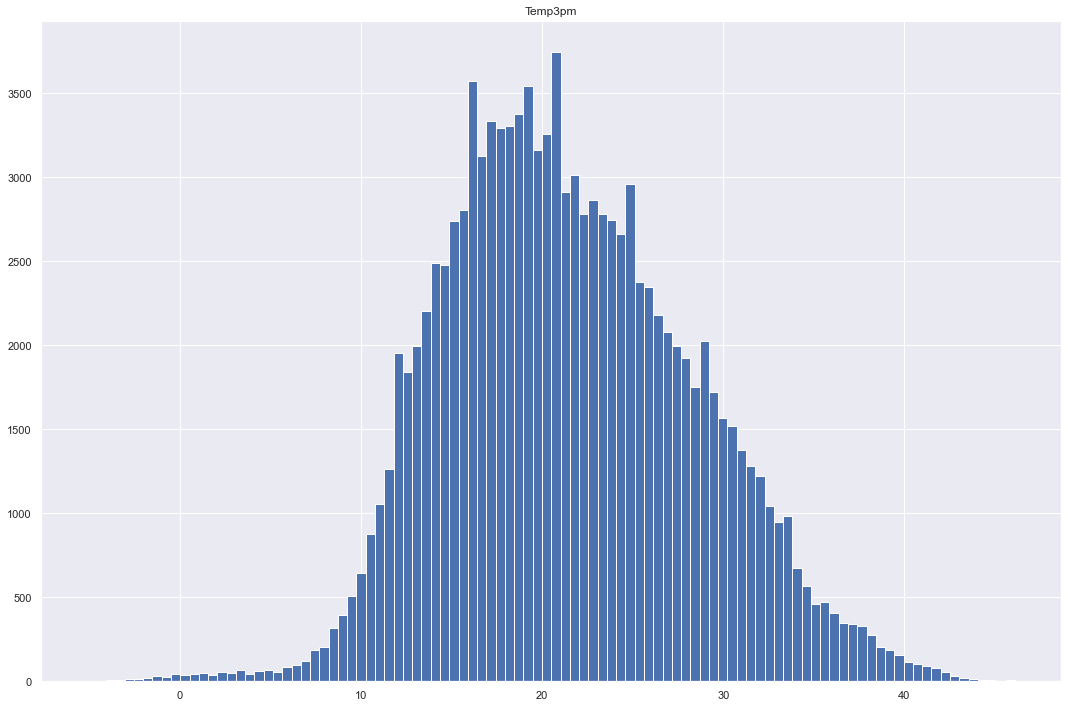

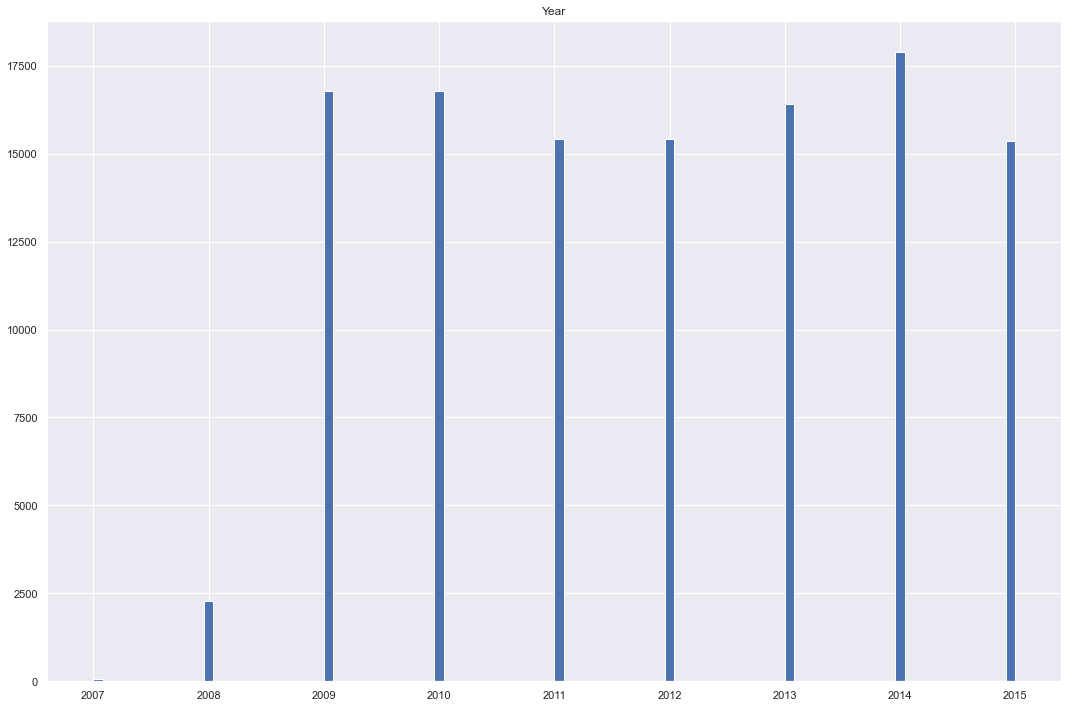

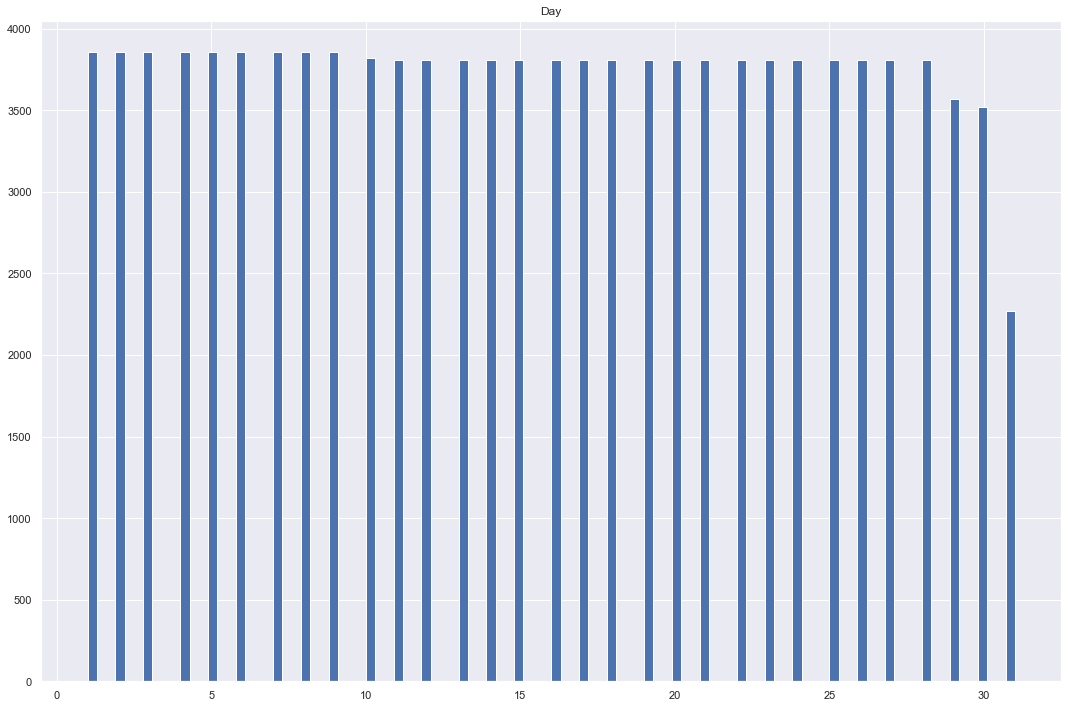

In [367]:
for col in numerical:
    fig = plt.figure(figsize=(15,10))
    ax = plt.gca()
    df_full_train.hist(bins=100, ax=ax, 
                       column=col)
    plt.tight_layout()
    plt.show()

### Check missing value

In [368]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Year                 0
Month                0
Day                  0
dtype: int64

In [369]:
for df2, dname in zip([df_full_train, df_train, df_val, df_test], df_name):
    print(f'Check missing value for {dname}')
    for feat in ['categorical', 'numerical']:
        print(f'Missing values for {feat} features')
        if feat == 'categorical':
            print(df2[categorical].isna().sum())
        else:
            print(df2[numerical].isna().sum())
        print('')

Check missing value for df_full_train
Missing values for categorical features
Location           0
WindGustDir     8548
WindDir9am      8872
WindDir3pm      2818
RainToday       2607
RainTomorrow    2607
Month              0
dtype: int64

Missing values for numerical features
MinTemp           1087
MaxTemp            882
Rainfall          2607
Evaporation      45945
Sunshine         50109
WindGustSpeed     8485
WindSpeed9am      1568
WindSpeed3pm      1764
Humidity9am       2117
Humidity3pm       2333
Pressure9am      11876
Pressure3pm      11842
Cloud9am         43137
Cloud3pm         44450
Temp9am           1444
Temp3pm           1620
Year                 0
Day                  0
dtype: int64

Check missing value for df_train
Missing values for categorical features
Location           0
WindGustDir     6706
WindDir9am      6498
WindDir3pm      1928
RainToday       1639
RainTomorrow    1637
Month              0
dtype: int64

Missing values for numerical features
MinTemp            655


### Check outliers in Numerical feature
As I stated before it is suspected that there are outliers in some Numerical features, I will checked first using boxplot.


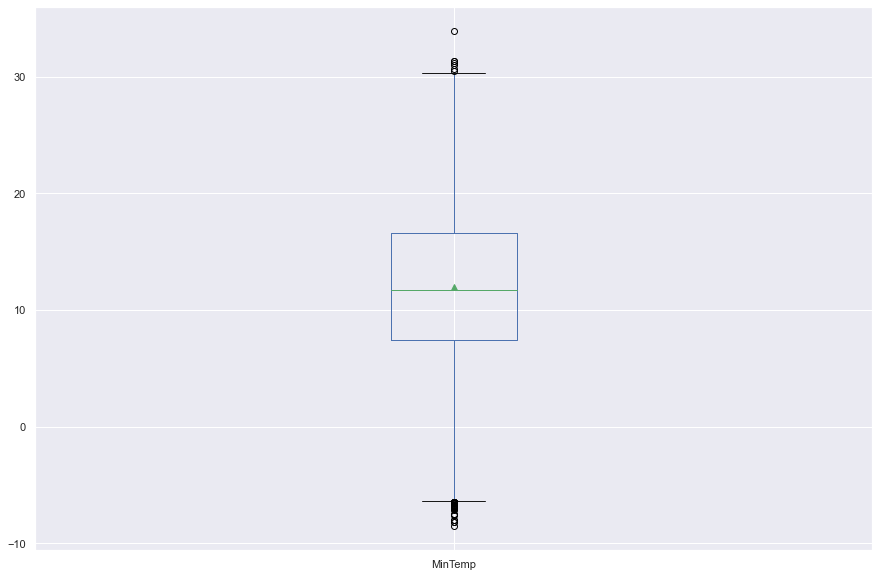

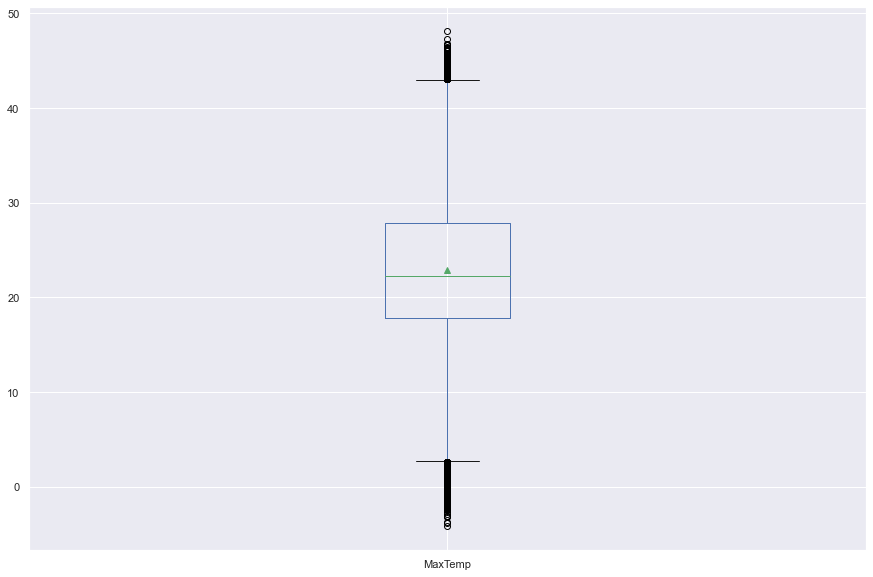

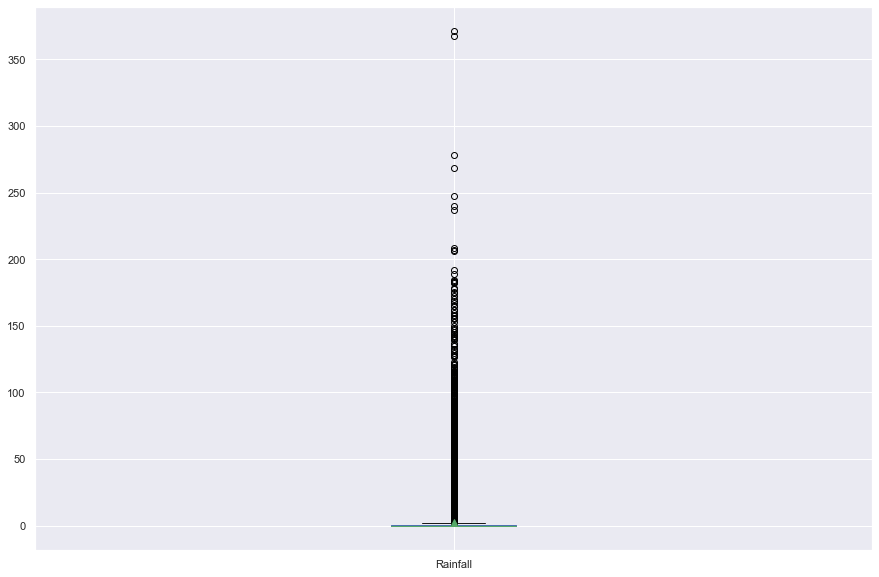

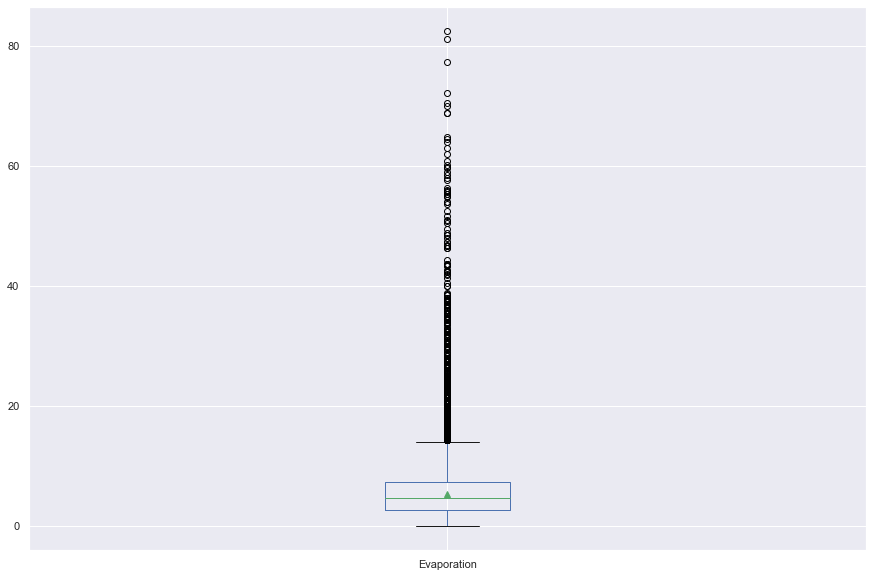

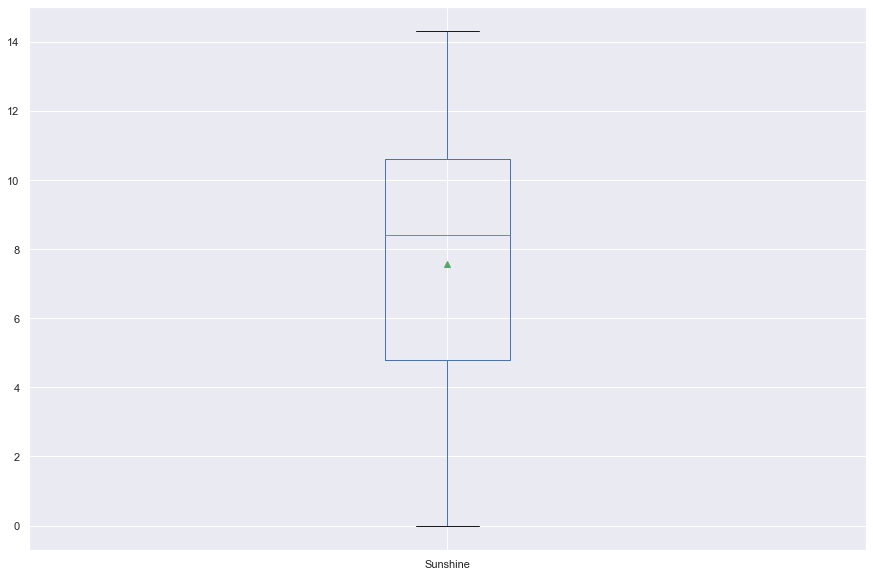

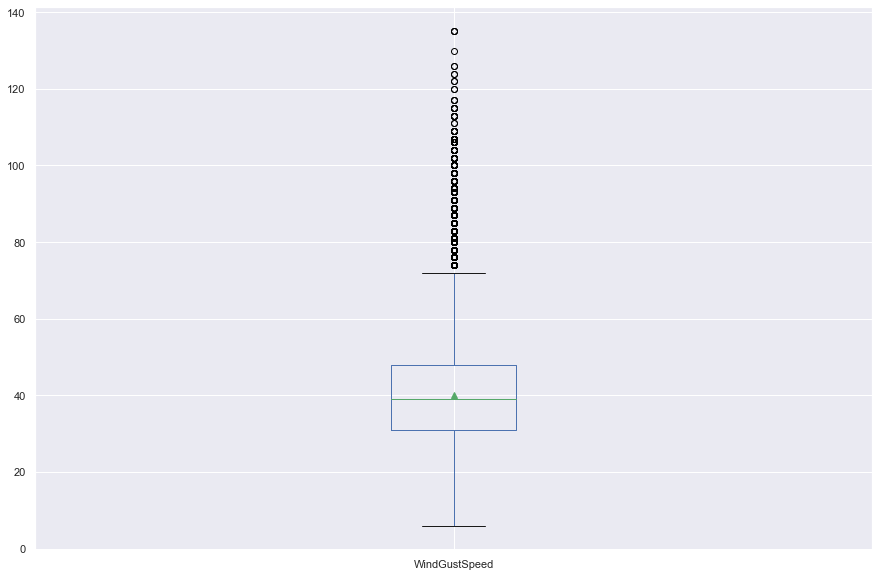

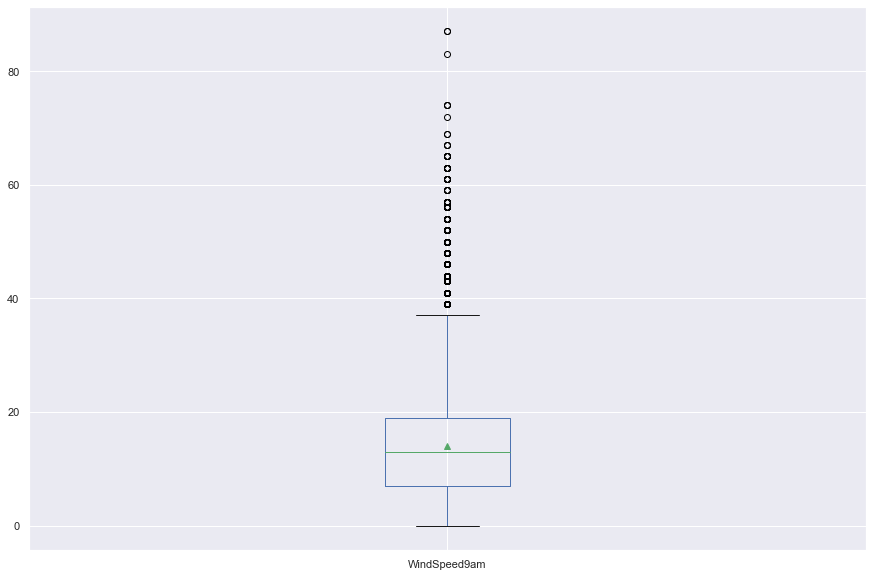

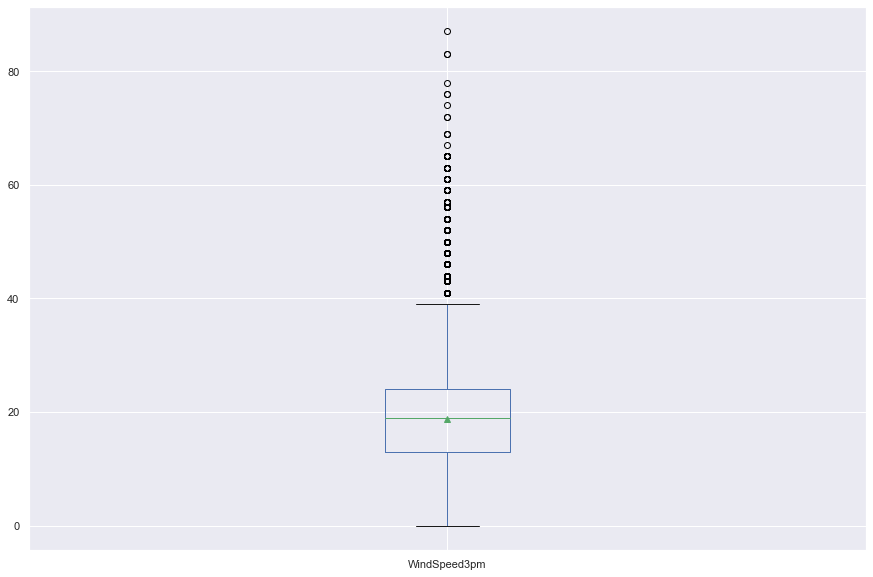

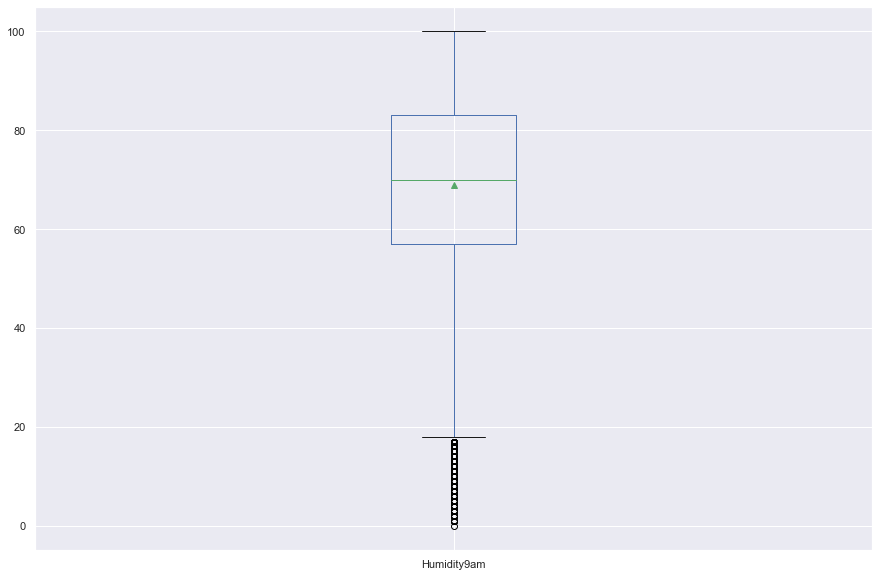

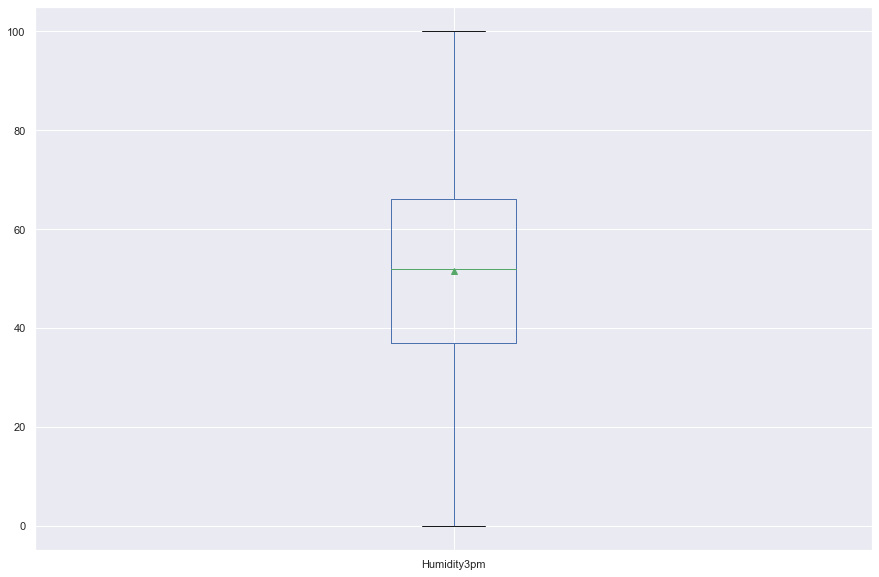

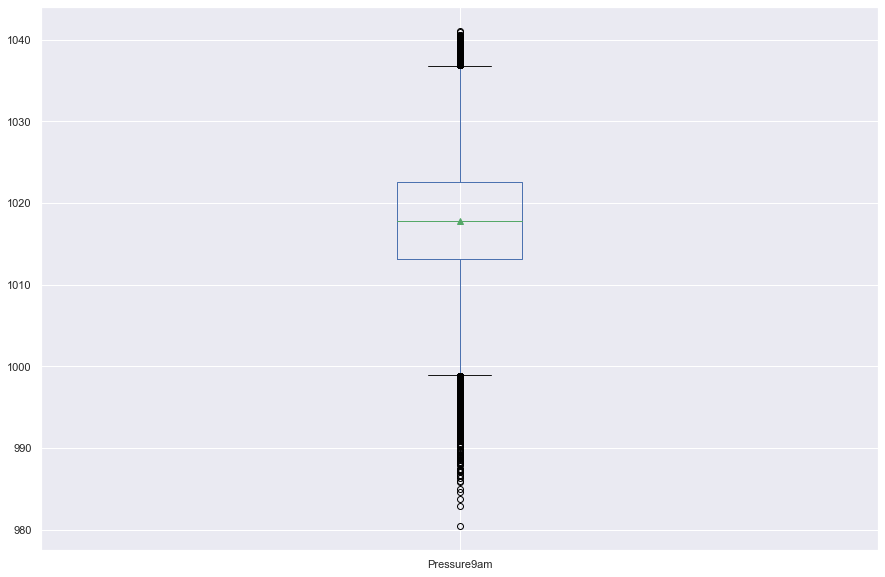

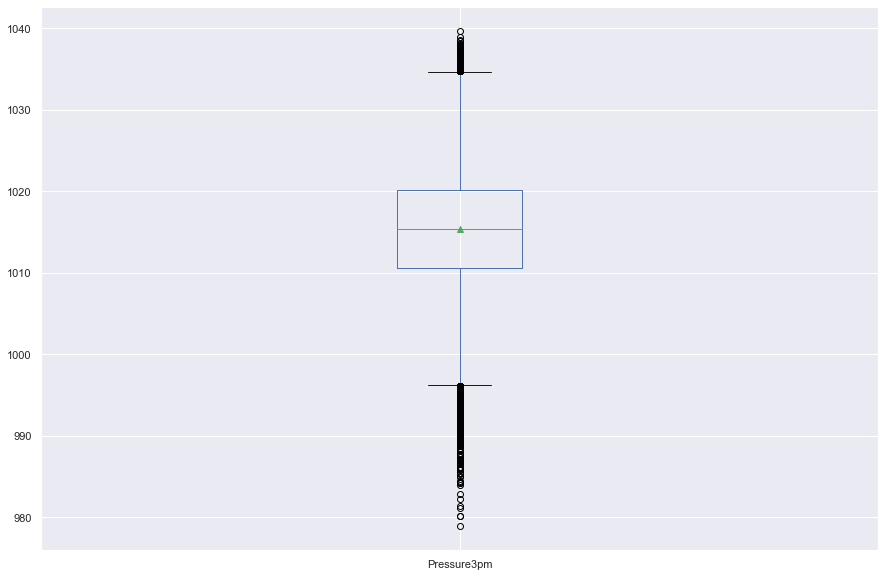

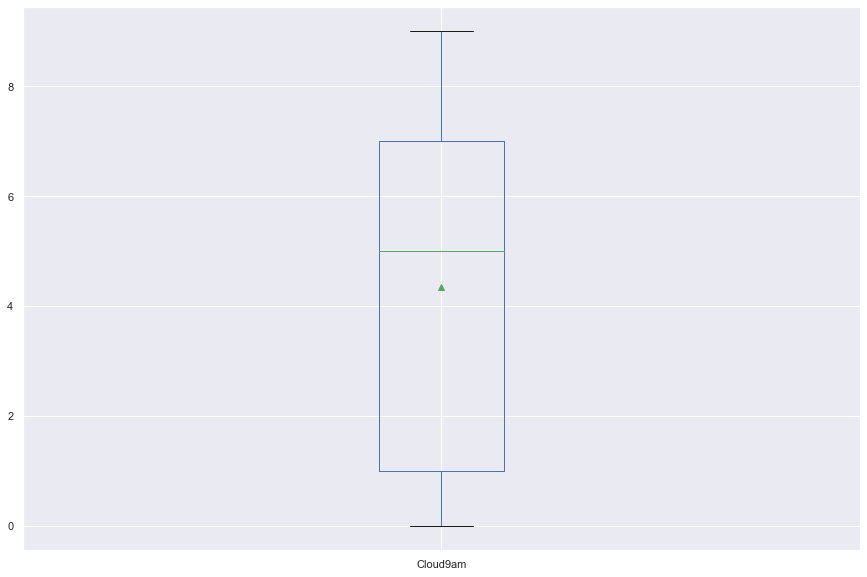

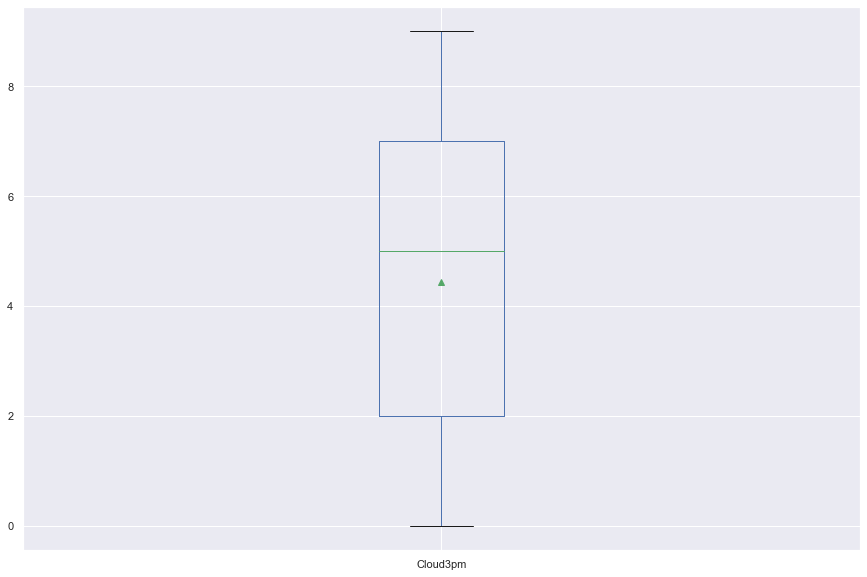

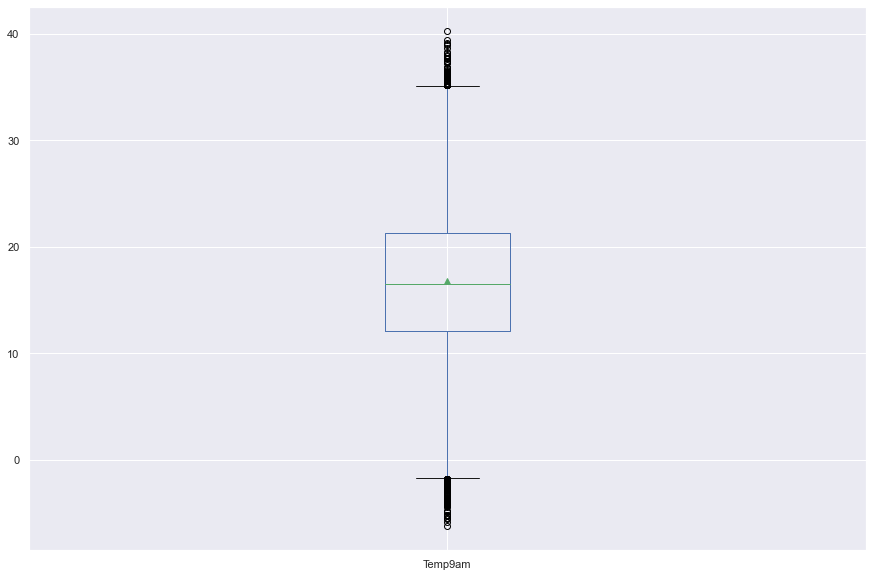

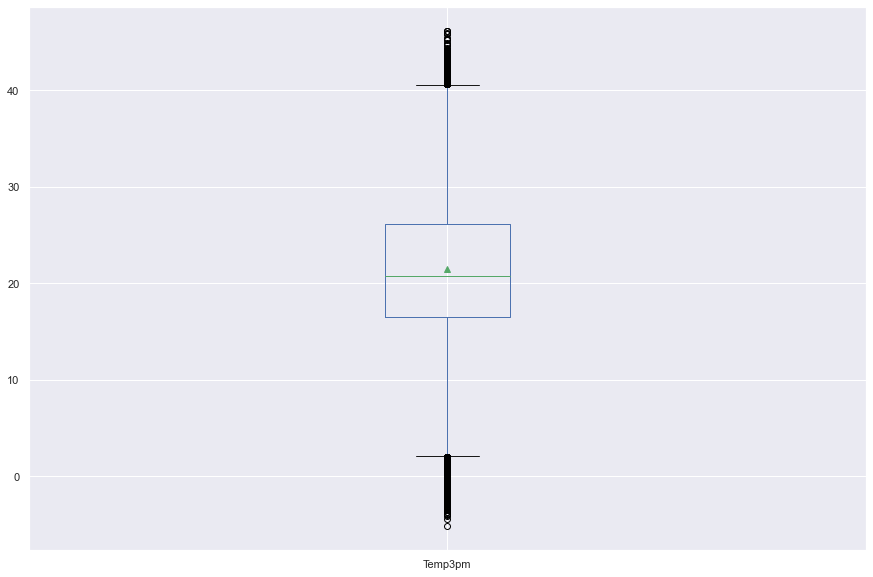

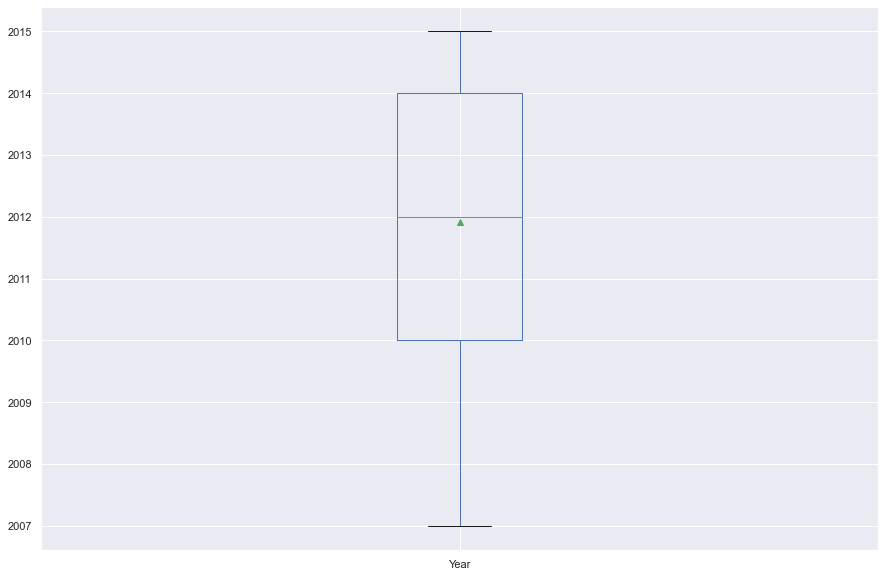

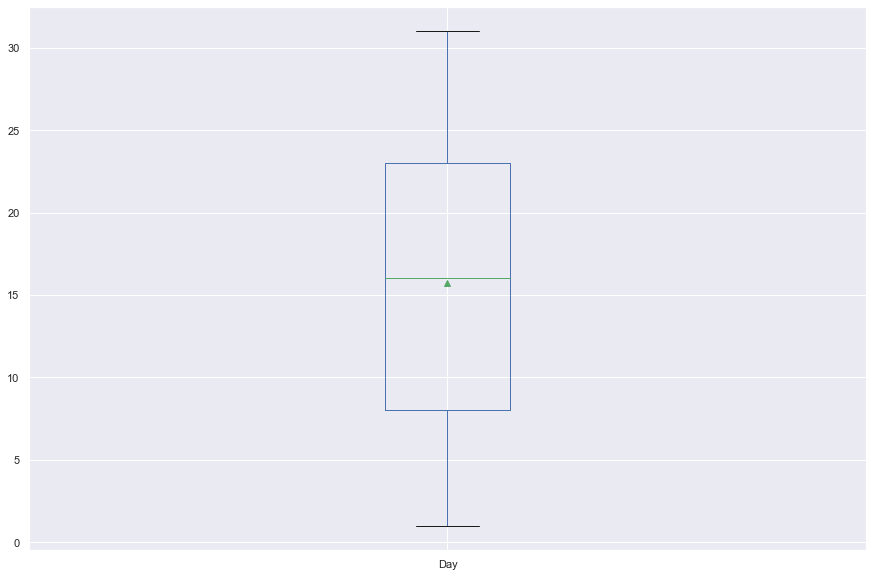

In [370]:
for num in numerical:
    ax = df_full_train[num].plot(kind='box', title='', showmeans=True, figsize=(15,10))
    plt.show()

From the boxplot visualization above, my suspicion turned out to be correct that there are some Numerical features that have outliers. To be sure again I use the IQR method to see where the outliers are.

In [371]:
for col in numerical:
    IQR = df_full_train[col].quantile(0.75) - df_full_train[col].quantile(0.25)
    Lower_fence = df_full_train[col].quantile(0.25) - (IQR * 3)
    Upper_fence = df_full_train[col].quantile(0.75) + (IQR * 3)
    max_val_col = df_full_train[col].max()
    min_val_col = df_full_train[col].min()
    print(f'Max and Min values for {col} are {max_val_col} and {min_val_col}')
    print(f'{col} outliers values at < {Lower_fence} or > {Upper_fence}')
    print('----------------------------------------------------------------------------')

Max and Min values for MinTemp are 33.9 and -8.5
MinTemp outliers values at < -20.200000000000003 or > 44.2
----------------------------------------------------------------------------
Max and Min values for MaxTemp are 48.1 and -4.1
MaxTemp outliers values at < -12.499999999999993 or > 58.19999999999999
----------------------------------------------------------------------------
Max and Min values for Rainfall are 371.0 and 0.0
Rainfall outliers values at < -2.4000000000000004 or > 3.2
----------------------------------------------------------------------------
Max and Min values for Evaporation are 82.4 and 0.0
Evaporation outliers values at < -11.2 or > 21.0
----------------------------------------------------------------------------
Max and Min values for Sunshine are 14.3 and 0.0
Sunshine outliers values at < -12.599999999999998 or > 28.0
----------------------------------------------------------------------------
Max and Min values for WindGustSpeed are 135.0 and 6.0
WindGustSpee

From the result above, it can be concluded that there are 5 Numerical features that contains outliers because the Max. value of the feature bigger than the upper boundary of the features. They are:
* `'Rainfall'`, 
* `'Evaporation'`, 
* `'WindGustSpeed'`,
* `'WindSpeed9am'`, 
* `'WindSpeed3pm'`  

Then, I created a list that contains all of the features above called `out_col`. 

In [372]:
out_col = ['Rainfall', 'Evaporation', 'WindGustSpeed',
           'WindSpeed9am', 'WindSpeed3pm']

### Australia rain season
In this part, I will do some visualization and analysis about Rain frequency in Australia using `RainToday` feature.  
First I looked at the Rain frequency throughout the year in `Year` feature. 

Text(0.5, 1.0, 'Rain Freq. per Year in Australia')

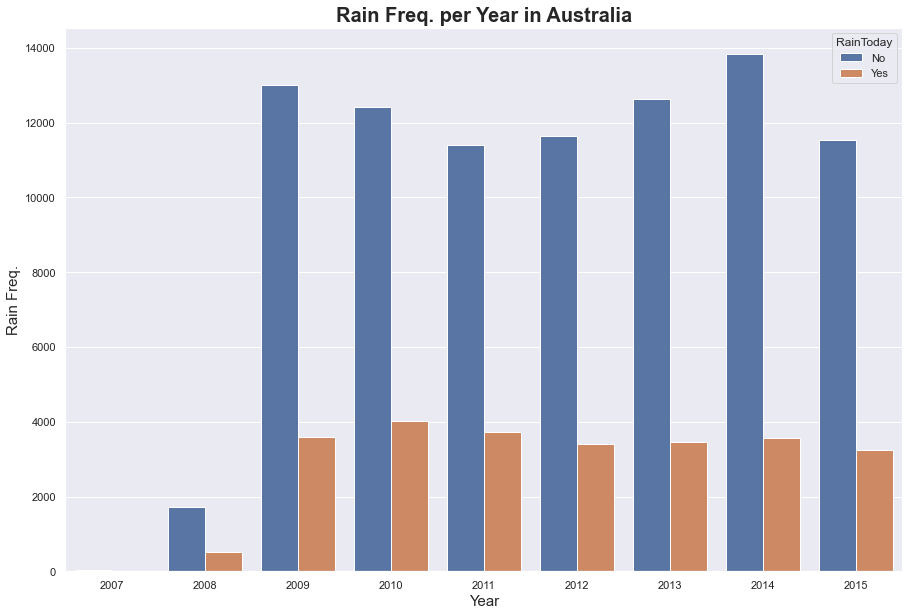

In [373]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_theme(style="darkgrid")
a = sns.countplot(x="Year", hue='RainToday', ax=ax,
                  data=df_full_train)

a.set_xlabel("Year",fontsize=15)
a.set_ylabel("Rain Freq.",fontsize=15)
a.set_title('Rain Freq. per Year in Australia',fontsize = 20, fontweight='bold' )

Text(0.5, 1.0, 'Rain Freq. for 2007 in Australia')

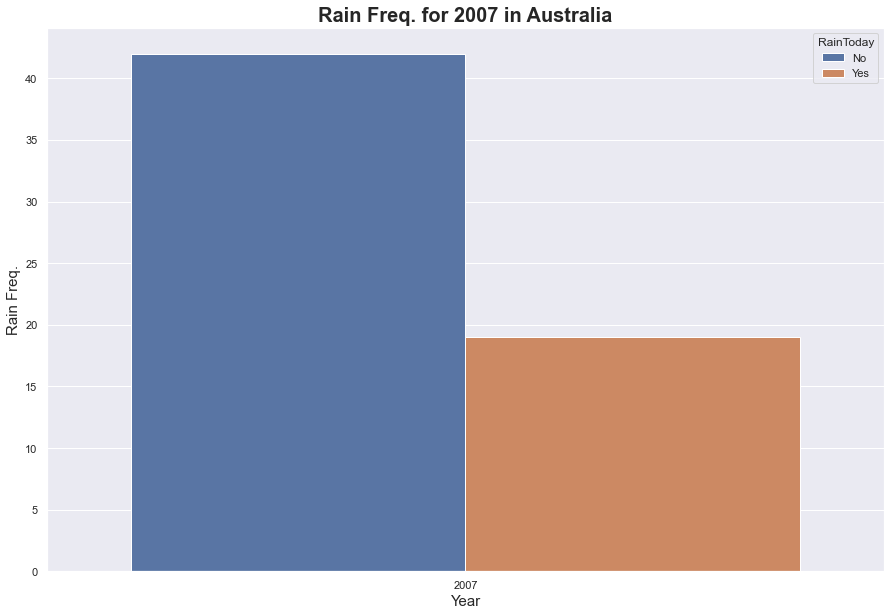

In [374]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_theme(style="darkgrid")
a = sns.countplot(x="Year", hue='RainToday', ax=ax,
                  data=df_full_train, order=df_full_train.Year.value_counts().iloc[8:].index)

a.set_xlabel("Year",fontsize=15)
a.set_ylabel("Rain Freq.",fontsize=15)
a.set_title('Rain Freq. for 2007 in Australia',fontsize = 20, fontweight='bold' )

From the graphs above it can be seen that from 2010-2011 the Rain frequency higher than other years. This happened because the weather in Australia affected by 2 strong La Niña events in those 2 years. (Source: [Australia Gov.](https://soe.environment.gov.au/theme/climate/topic/2016/rainfall))

How about Rain frequency per Month in Australia?  
The answer can be seen in this graph below.

Text(0.5, 1.0, 'Rain Freq. per Month in Australia')

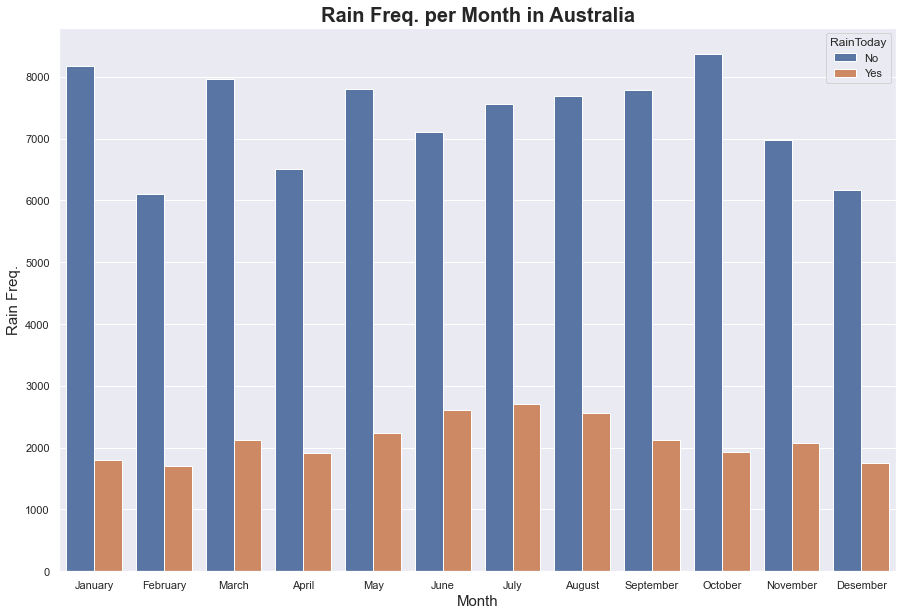

In [375]:
month_order = ['January', 'February', 'March',
               'April', 'May', 'June',
               'July', 'August', 'September',
               'October', 'November', 'Desember']
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_theme(style="darkgrid")
a = sns.countplot(x="Month", hue='RainToday', ax=ax,
                  data=df_full_train, order=month_order)

a.set_xlabel("Month",fontsize=15)
a.set_ylabel("Rain Freq.",fontsize=15)
a.set_title('Rain Freq. per Month in Australia',fontsize = 20, fontweight='bold' )

From the graph above, it can be concluded that Rain frequency getting higher from April until July. This happened because most of the Australia region experiences its highest rainfall from April until November.
(Source: [Australia Gov.](https://soe.environment.gov.au/theme/climate/topic/2016/rainfall))

For the rain distribution recorded in Australia region can be seen in this graph below.

Text(0.5, 1.0, 'Rain Freq. per Location in Australia')

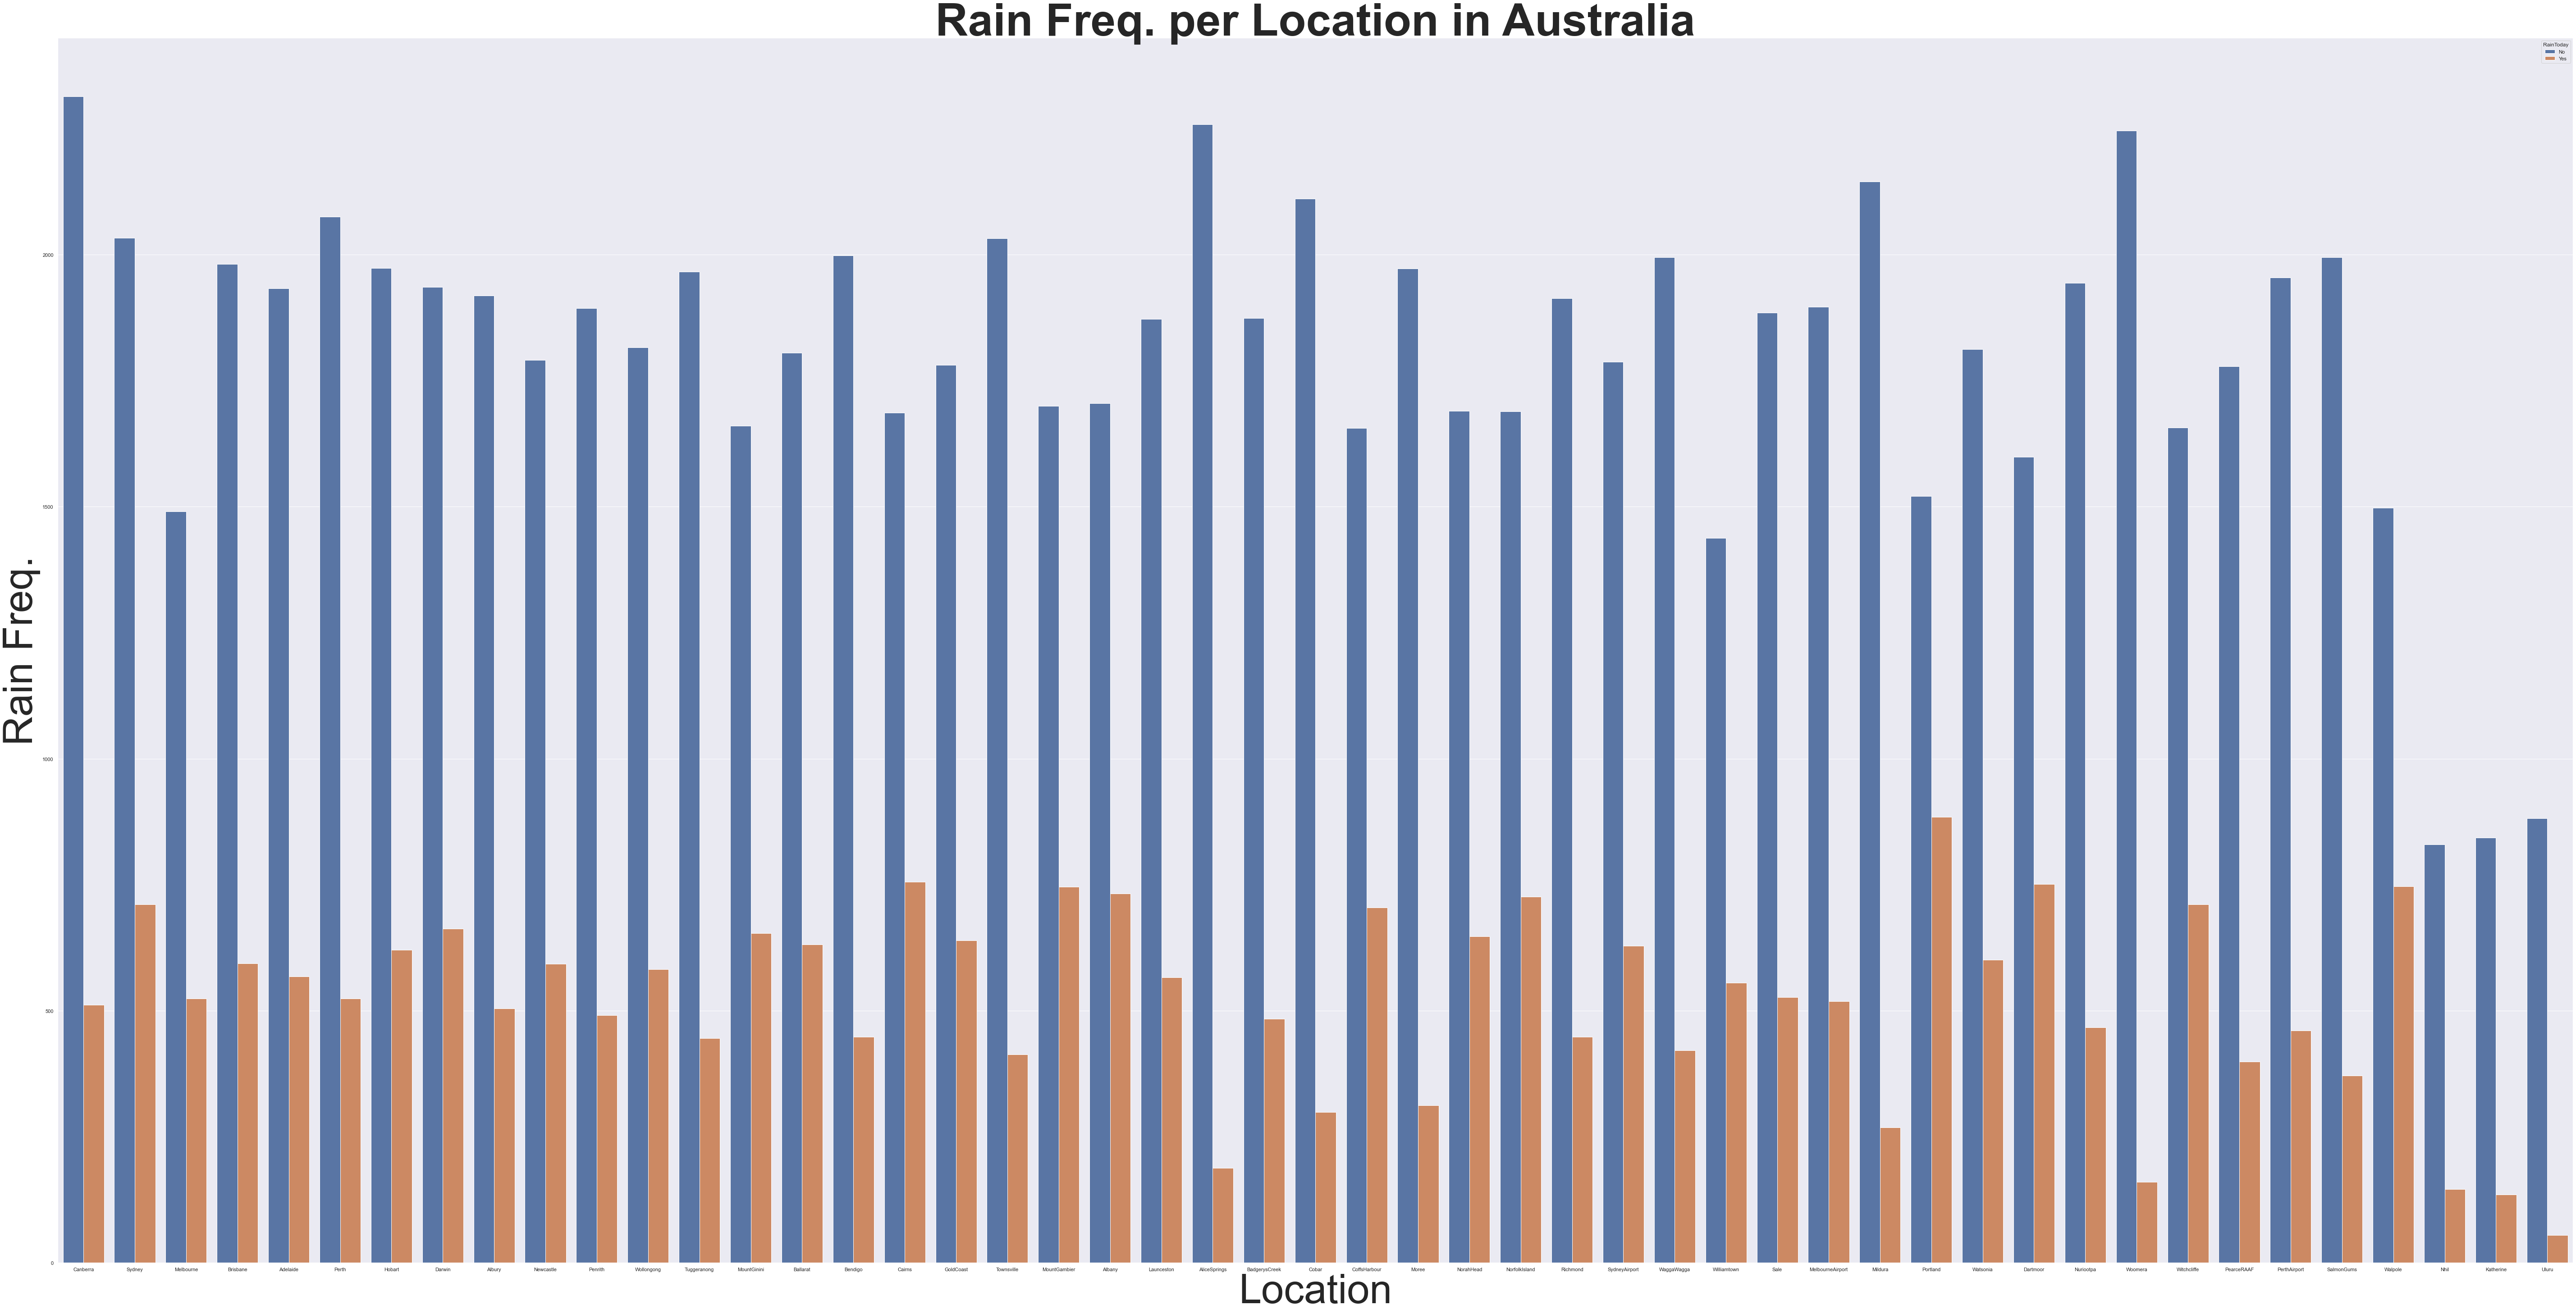

In [376]:
fig_dims = (100, 50)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_theme(style="darkgrid")
a = sns.countplot(x="Location", hue='RainToday', ax=ax,
                   data=df_full_train)

a.set_xlabel("Location",fontsize=90)
a.set_ylabel("Rain Freq.",fontsize=90)
a.set_title('Rain Freq. per Location in Australia',fontsize = 100, fontweight='bold' )

![alt text](loc-rain-fix-1.png "Title")

From the graph above it can be seen that Portland region recorded more rain than other region because Portland is located in Victoria which have one of the highest Rain frequency in Australia. (Source: [Australia Gov.](https://soe.environment.gov.au/theme/climate/topic/2016/rainfall))

### Explore Target (`RainTomorrow`) feature

In [377]:
df_full_train['RainTomorrow'].value_counts()

No     88232
Yes    25529
Name: RainTomorrow, dtype: int64

C:\Users\Aditya Rafi\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Target class distribution')

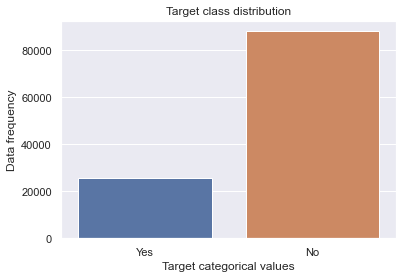

In [378]:
sns.countplot(df_full_train['RainTomorrow']).set(ylabel = "Data frequency", 
                                                 xlabel = "Target categorical values"
                                                )                                               
plt.title('Target class distribution')

Information above tells us that:
* The `No` variable have 88232 values, and
* The `Yes` variable have 25529 values

## **Feature Engineering**
---
### Deals with missing value
For dealing with missing value I assume that the data are missing completely at random (MCAR). Because there are still outlier in this dataset, it is better to use median imputation for both Categorical and Numerical features to avoid Overfitting condition.

In [379]:
for df3 in [df_full_train, df_train, df_val, df_test]:
    for col in numerical:
        col_median=df_full_train[col].median()
        df3[col].fillna(col_median, inplace=True)    

C:\Users\Aditya Rafi\anaconda3\envs\myenv\lib\site-packages\pandas\core\series.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [380]:
for df4 in [df_full_train, df_train, df_val, df_test]:
    for col in categorical:
        freq_val = df_full_train[col].mode()[0]
        df4[col].fillna(freq_val, inplace=True)

In [381]:
df_name = ['df_full_train', 'df_train', 'df_val', 'df_test']

for df5, dname in zip([df_full_train, df_train, df_val, df_test], df_name):
    print(f'Check missing value for {dname}')
    for feat in ['categorical', 'numerical']:
        print(f'Missing values for {feat} features')
        if feat == 'categorical':
            print(df5[categorical].isna().sum())
        else:
            print(df5[numerical].isna().sum())
        print('')
    print('-------------------------------------------------------------')

Check missing value for df_full_train
Missing values for categorical features
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
Month           0
dtype: int64

Missing values for numerical features
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Day              0
dtype: int64

-------------------------------------------------------------
Check missing value for df_train
Missing values for categorical features
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
Month           0
dtype: int64

Missing values for numerical features
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0

### Deals with Outliers
For dealing with outliers in Numerical values I used top-coding strategy to normalize the outliers value. To see reference for top-coding strategy you can see in this [reference](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/74038/j.1467-985X.2007.00492.x.pdf?sequence=1&isAllowed=y).

In [382]:
def max_value(df, feature, top):
    top_code = np.where(df[feature]>top, top, df[feature])
    return top_code

In [383]:
df_name = ['df_full_train', 'df_train', 'df_val', 'df_test']
out_col = ['Rainfall', 'Evaporation', 'WindGustSpeed',
           'WindSpeed9am', 'WindSpeed3pm']
value_max = [3.2, 21.0, 99.0, 55.0, 57.0]

for df6, dname in zip([df_full_train, df_train, df_val, df_test], df_name):
    print(f'Dealing with outliers at {dname}')
    for col, val in zip(out_col, value_max):
        df6[col] = max_value(df6, col, val)
        print(f'Max and Min values for {col} are {df6[col].max()} and {df6[col].min()}')
    print('---------------------------------------------------------------------')

Dealing with outliers at df_full_train
Max and Min values for Rainfall are 3.2 and 0.0
Max and Min values for Evaporation are 21.0 and 0.0
Max and Min values for WindGustSpeed are 99.0 and 6.0
Max and Min values for WindSpeed9am are 55.0 and 0.0
Max and Min values for WindSpeed3pm are 57.0 and 0.0
---------------------------------------------------------------------
Dealing with outliers at df_train
Max and Min values for Rainfall are 3.2 and 0.0
Max and Min values for Evaporation are 21.0 and 0.0
Max and Min values for WindGustSpeed are 99.0 and 6.0
Max and Min values for WindSpeed9am are 55.0 and 0.0
Max and Min values for WindSpeed3pm are 57.0 and 0.0
---------------------------------------------------------------------
Dealing with outliers at df_val
Max and Min values for Rainfall are 3.2 and 0.0
Max and Min values for Evaporation are 21.0 and 0.0
Max and Min values for WindGustSpeed are 99.0 and 7.0
Max and Min values for WindSpeed9am are 55.0 and 0.0
Max and Min values for WindS

C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_12176/4162461831.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6[col] = max_value(df6, col, val)
C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_12176/4162461831.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6[col] = max_value(df6, col, val)
C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_12176/4162461831.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

From the results above it can be seen that the max. value for the feature that contains outliers is below the upper boundary from IQR method.

## **Feature Importances**
---
### Mutual Info Score for Categorical features

In [384]:
def mutual_info_target_score(series):
    mis = mutual_info_score(series, df_full_train.RainTomorrow)
    return mis

In [385]:
cat = categorical
cat.remove('RainTomorrow')
mi_scores = df_full_train[cat].apply(mutual_info_target_score)
mi_scores.sort_values(ascending=False).round(4).to_frame(name='Mutual Info')

,Mutual Info
RainToday,0.0432
Location,0.0131
WindDir9am,0.0063
WindGustDir,0.0050
WindDir3pm,0.0039
Month,0.0018


From the mutual info score result, I got information that from the six categorical features, the 'RainToday' feature or information on whether rain today or not is the most important feature.

### Correlation Matrix and Heatmap for Numerical features

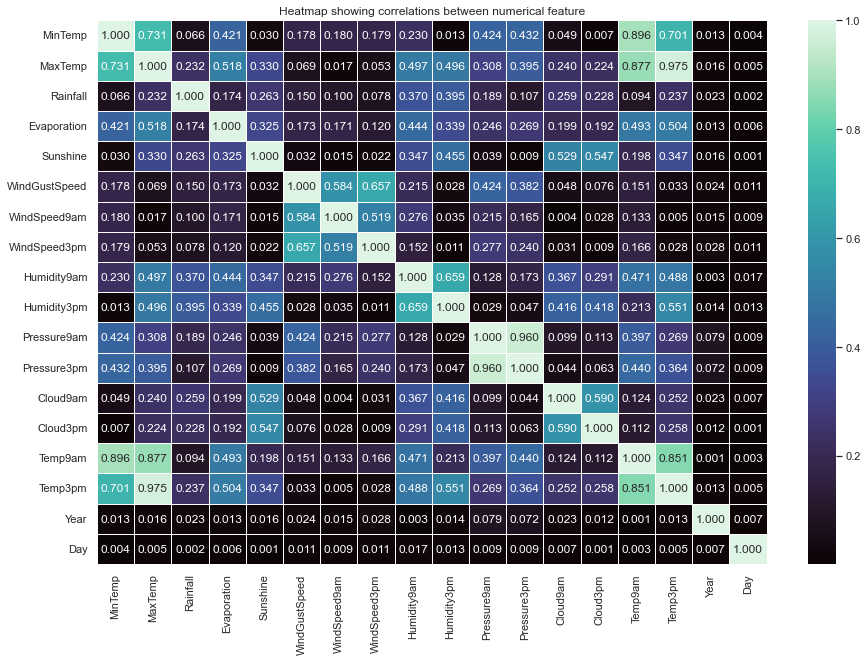

In [386]:
corr = df_full_train[numerical].corr().abs()

plt.figure(figsize=(15,10))  
sns.heatmap(corr, annot=True, cmap='mako', fmt='.3f', linewidths=1, linecolor='White')
plt.title('Heatmap showing correlations between numerical feature')
plt.show()

The information obtained from the correlation matrix of the numerical features above is that:
* `MinTemp` and `MaxTemp` variables are highly positively correlated (correlation coefficient = 0.731).
* `MinTemp` and `Temp3pm` variables are also highly positively correlated (correlation coefficient = 0.701).
* `MinTemp` and `Temp9am` variables are strongly positively correlated (correlation coefficient = 0.896).
* `MaxTemp` and `Temp9am` variables are strongly positively correlated (correlation coefficient = 0.877).
* `MaxTemp` and `Temp3pm` variables are also strongly positively correlated (correlation coefficient = 0.975).
* `WindGustSpeed` and `WindSpeed3pm` variables are highly positively correlated (correlation coefficient = 0.657).
* `Pressure9am` and `Pressure3pm` variables are strongly positively correlated (correlation coefficient = 0.960).
* `Temp9am` and `Temp3pm` variables are strongly positively correlated (correlation coefficient = 0.851).

## **Declare Features for Capstone Project**
---

In [387]:
for df7 in [df_full_train, df_train, df_val, df_test]:
    df7['target_cat'] = (df7.RainTomorrow == 'Yes').astype(int)
    del df7['RainTomorrow']

C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_12176/3646954411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['target_cat'] = (df7.RainTomorrow == 'Yes').astype(int)


In [388]:
y_full_train = df_full_train.target_cat.values
y_train = df_train.target_cat.values
y_val = df_val.target_cat.values
y_test = df_test.target_cat.values

In [389]:
for df8 in [df_full_train, df_train, df_val, df_test]:
    df8.drop('target_cat', axis=1, inplace = True)

C:\Users\Aditya Rafi\anaconda3\envs\myenv\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [390]:
categorical, numerical = get_cat_num_feat(df_full_train)

print(f'There are {len(categorical)} categorical features')
print('The categorical features are :', categorical)

print('')

print(f'There are {len(numerical)} numerical features')
print('The numerical features are :', numerical)

There are 6 categorical features
The categorical features are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'Month']

There are 18 numerical features
The numerical features are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Day']


## **OHE with DictVectorizer()**
---

In [391]:
def OHE_DV(df, dv, col):
    dicts = df[col].to_dict(orient='records')
    X_data = dv.fit_transform(dicts)
    
    return X_data
#-------------------------------------------------------#
def OHE_DV_wo_fit(df, dv, col):
    dicts = df[col].to_dict(orient='records')
    X_data = dv.transform(dicts)
    
    return X_data

In [392]:
dv = DictVectorizer(sparse=False)

X_col = categorical+numerical 

X_train = OHE_DV(df_train, dv, X_col)
X_val = OHE_DV_wo_fit(df_val, dv, X_col)

X_train.shape, X_val.shape

((87276, 129), (29092, 129))

## **Machine Learning Model**
---
For this midterm project there are a few model for classification that I used:

* `LogisticRegression()`
* `DecisionTreeClassifier()`
* `RandomForestClassifier()`
* `XGBoost()`

The best parameter and model will be selected based on the best performance of the model seen from AUC score of the validation data for each trained model.
### Logistic Regression
> Tuning `C` parameter for `LogisticRegression()`

In [393]:
scores = []
for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    y_pred_val = model.predict_proba(X_val)[:,1]
    auc_val = roc_auc_score(y_val, y_pred_val).round(3)
    
    y_pred_train = model.predict_proba(X_train)[:,1]
    auc_train = roc_auc_score(y_train, y_pred_train).round(3)
    
    print('C = %5s | AUC-train = %.3f | AUC-val = %.3f' % (C, auc_train, auc_val))

C = 0.001 | AUC-train = 0.868 | AUC-val = 0.857
C =  0.01 | AUC-train = 0.870 | AUC-val = 0.859
C =   0.1 | AUC-train = 0.873 | AUC-val = 0.862
C =     1 | AUC-train = 0.870 | AUC-val = 0.859
C =    10 | AUC-train = 0.872 | AUC-val = 0.861
C =   100 | AUC-train = 0.872 | AUC-val = 0.861


From the AUC for train and validation, the best `C` for Logistic Regression model is 0.1

### Decision Tree
> Tuning `max_depth` parameter for `DecisionTree()`

In [394]:
for md in [1, 2, 3 ,4, 5, 6, 7, 8, 9, 10]:
    
    dt = DecisionTreeClassifier(max_depth=md)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    y_pred_train = dt.predict_proba(X_train)[:, 1]
    auc_train = roc_auc_score(y_train, y_pred_train)
    
    print('max_dept = %2s | AUC_train = %.3f | AUC_val = %.3f' % (md, auc_train, auc))

max_dept =  1 | AUC_train = 0.690 | AUC_val = 0.684
max_dept =  2 | AUC_train = 0.773 | AUC_val = 0.757
max_dept =  3 | AUC_train = 0.806 | AUC_val = 0.790
max_dept =  4 | AUC_train = 0.824 | AUC_val = 0.805
max_dept =  5 | AUC_train = 0.840 | AUC_val = 0.823
max_dept =  6 | AUC_train = 0.851 | AUC_val = 0.831
max_dept =  7 | AUC_train = 0.860 | AUC_val = 0.835
max_dept =  8 | AUC_train = 0.868 | AUC_val = 0.835
max_dept =  9 | AUC_train = 0.877 | AUC_val = 0.826
max_dept = 10 | AUC_train = 0.888 | AUC_val = 0.820


From the AUC for train and validation the best `max_depth` is between 7 to 10.

> Tuning `min_samples_leaf` parameter for `DecisionTree()`

In [395]:
scores = []

for depth in [7, 8, 9, 10]:
    for s in [1, 5, 10, 15, 20, 25, 100, 200, 250, 500]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        y_pred_train = dt.predict_proba(X_train)[:, 1]
        auc_train = roc_auc_score(y_train, y_pred_train)    
        
        scores.append((depth, s, auc_train, auc))

In [396]:
columns = ['max_depth', 'min_samples_leaf', 'AUC_train', 'AUC_val']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores_pivot = df_scores.pivot(index='min_samples_leaf', 
                                  columns=['max_depth'], 
                                  values=['AUC_train', 'AUC_val'])
df_scores_pivot.round(3)

AUC_train                      AUC_val                     
max_depth               7      8      9      10      7      8      9      10
min_samples_leaf                                                            
1                    0.860  0.868  0.877  0.888   0.835  0.835  0.826  0.818
5                    0.860  0.868  0.877  0.888   0.835  0.836  0.830  0.824
10                   0.860  0.868  0.877  0.887   0.835  0.837  0.834  0.828
15                   0.859  0.868  0.876  0.885   0.835  0.838  0.836  0.832
20                   0.859  0.867  0.876  0.884   0.835  0.838  0.837  0.834
25                   0.859  0.867  0.875  0.883   0.835  0.839  0.838  0.835
100                  0.859  0.865  0.870  0.874   0.836  0.840  0.841  0.841
200                  0.858  0.863  0.867  0.869   0.837  0.841  0.842  0.843
250                  0.857  0.862  0.866  0.867   0.836  0.840  0.841  0.843
500                  0.855  0.858  0.860  0.861   0.834  0.839  0.839  0.840

The table above shows that the best AUC score is generated from `max_depth` = 10 and `min_samples_leaf` = 200.

### Random Forest
> Tuning `random_state` parameter for `RandomForestClassifier()`

In [397]:
scores = []
for r in [1, 3, 5, 10]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, random_state=r, n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
    
        y_pred_train = rf.predict_proba(X_train)[:, 1]
        auc_train = roc_auc_score(y_train, y_pred_train)
        
        scores.append((n, r, auc_train, auc))

df_scores = pd.DataFrame(scores, columns=['n_estimators', 'random_state',
                                          'AUC_train', 'AUC_val'])

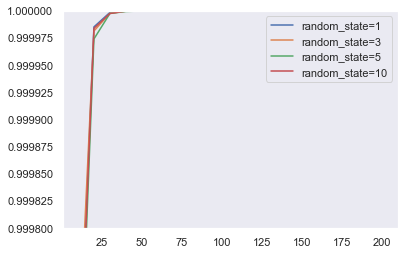

In [398]:
for r in [1, 3, 5, 10]:
    df_subset = df_scores[df_scores.random_state == r]
    
    plt.plot(df_subset.n_estimators, df_subset['AUC_train'],
             label='random_state=%d' % r)
    plt.ylim(0.9998, 1)
plt.legend()
plt.grid()

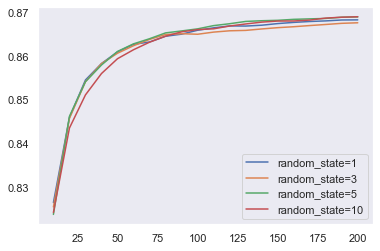

In [399]:
for r in [1, 3, 5, 10]:
    df_subset = df_scores[df_scores.random_state == r]
    
    plt.plot(df_subset.n_estimators, df_subset.AUC_val,
             label='random_state=%d' % r)

plt.legend()
plt.grid()

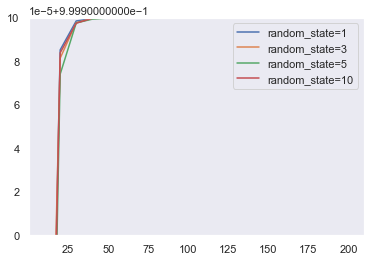

In [400]:
for r in [1, 3, 5, 10]:
    df_subset = df_scores[df_scores.random_state == r]
    
    plt.plot(df_subset.n_estimators, df_subset['AUC_train'],
             label='random_state=%d' % r)
    plt.ylim(0.9999, 1)
plt.legend()
plt.grid()

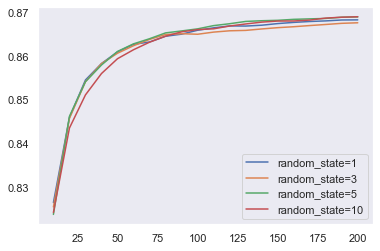

In [401]:
for r in [1, 3, 5, 10]:
    df_subset = df_scores[df_scores.random_state == r]
    
    plt.plot(df_subset.n_estimators, df_subset.AUC_val,
             label='random_state=%d' % r)

plt.legend()
plt.grid()

> Tuning `max_depth` parameter for `RandomForestClassifier()`

In [402]:
r = 10
scores = []

for d in [5, 10, 15, 20]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=r, n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        y_pred_train = rf.predict_proba(X_train)[:, 1]
        auc_train = roc_auc_score(y_train, y_pred_train)        

        scores.append((d, n, auc_train, auc))

In [403]:
columns = ['max_depth', 'n_estimators', 'AUC_train', 'AUC_val']
df_scores = pd.DataFrame(scores, columns=columns)

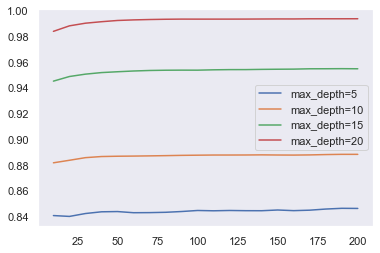

In [404]:
for d in [5, 10, 15, 20]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.AUC_train,
             label='max_depth=%d' % d)

plt.legend()
plt.grid()

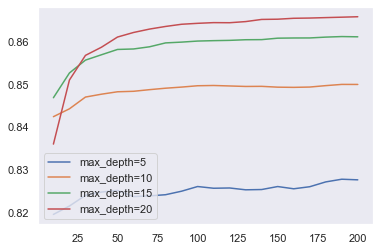

In [405]:
for d in [5, 10, 15, 20]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.AUC_val,
             label='max_depth=%d' % d)

plt.legend()
plt.grid()

> Tuning `min_samples_leaf` parameter for `RandomForestClassifier()`

In [406]:
max_depth = 20
r = 10
scores = []

for s in [1, 3, 5, 10, 50, 100]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=r, n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        y_pred_train = rf.predict_proba(X_train)[:, 1]
        auc_train = roc_auc_score(y_train, y_pred_train) 
        
        scores.append((s, n, auc_train, auc))

In [407]:
columns = ['min_samples_leaf', 'n_estimators', 'AUC_train', 'AUC_val']
df_scores = pd.DataFrame(scores, columns=columns)

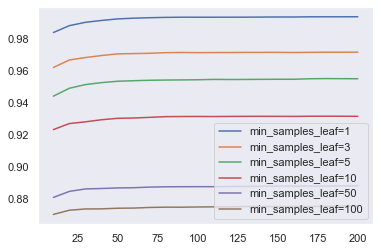

In [408]:
for s in [1, 3, 5, 10, 50, 100]:
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.AUC_train,
             label='min_samples_leaf=%d' % s)

plt.legend()
plt.grid()

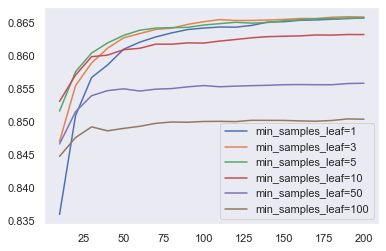

In [409]:
for s in [1, 3, 5, 10, 50, 100]:
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.AUC_val,
             label='min_samples_leaf=%d' % s)

plt.legend()
plt.grid()

> Tuning `max_features` parameter for `RandomForestClassifier()`

In [410]:
scores = []
max_depth = 20
r = 10
s = 1

for f in [1, 3, 5, 10, 20]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    max_features=f,
                                    min_samples_leaf=s,
                                    random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        y_pred_train = rf.predict_proba(X_train)[:, 1]
        auc_train = roc_auc_score(y_train, y_pred_train)
        
        scores.append((f, n, auc_train, auc))

In [417]:
columns = ['max_features', 'n_estimators', 'AUC_train', 'AUC_val']
df_scores = pd.DataFrame(scores, columns=columns)

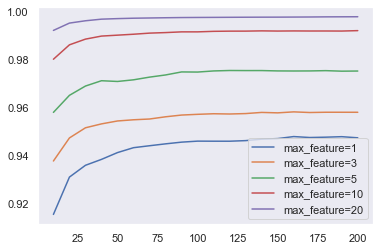

In [418]:
for f in [1, 3, 5, 10, 20]:
    df_subset = df_scores[df_scores.max_features == f]
    
    plt.plot(df_subset.n_estimators, df_subset.AUC_train,
             label='max_feature=%d' % f)

plt.legend()
plt.grid()

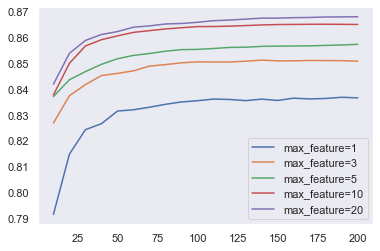

In [419]:
for f in [1, 3, 5, 10, 20]:
    df_subset = df_scores[df_scores.max_features == f]
    
    plt.plot(df_subset.n_estimators, df_subset.AUC_val,
             label='max_feature=%d' % f)

plt.legend()
plt.grid()

From all of the tuning above it can be conluded that:
* `n_estimators` = 200
* `random_state` = 10
* `max_depth` = 20
* `max_features` = 20
* `min_samples_leaf` = 1  

Gives the best model performance. Therefore, those parameter choose to be the final values of Random Forest model parameter.

### XGBoost

In [414]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

> Matrix for XGBoost

In [415]:
features = dv.get_feature_names() 
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features) 
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

> Watchlist

In [416]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

> Tuning `eta` parameter for `XGBoost()`

In [420]:
scores_eta = {}

In [429]:
%%capture output

xgb_params = {
    'eta': 0.5, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  evals=watchlist)

In [430]:
key = 'eta=%s' % (xgb_params['eta'])
scores_eta[key] = parse_xgb_output(output)
scores_eta.keys()

dict_keys(['eta=0.01', 'eta=0.05', 'eta=0.1', 'eta=0.3', 'eta=0.5'])

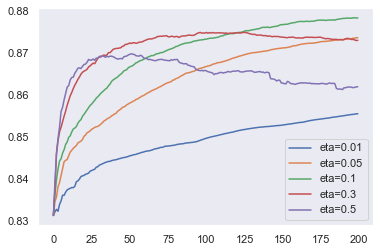

In [431]:
etas = ['eta=0.01', 'eta=0.05', 'eta=0.1', 'eta=0.3', 'eta=0.5']

for eta in etas:
    df_score = scores_eta[eta]
    
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)

    plt.grid()
    plt.legend()

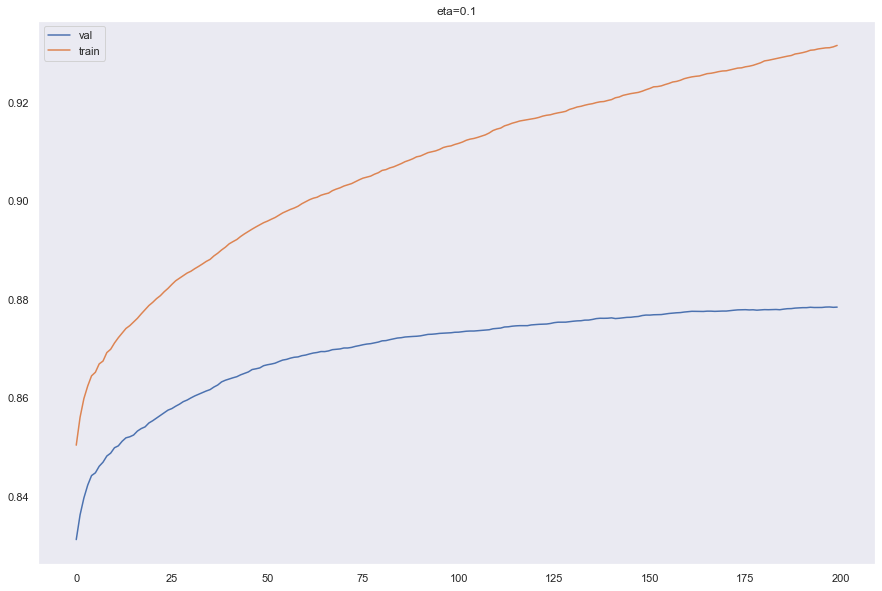

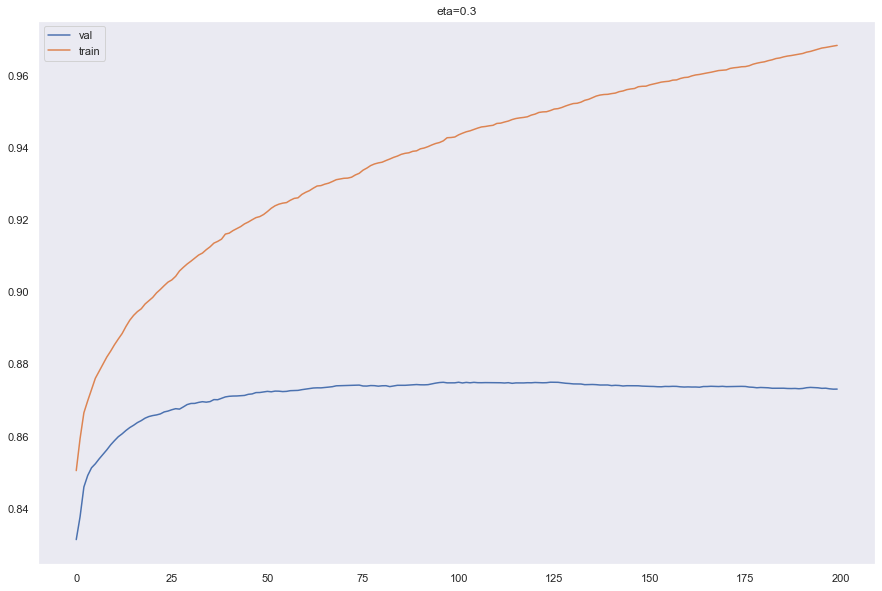

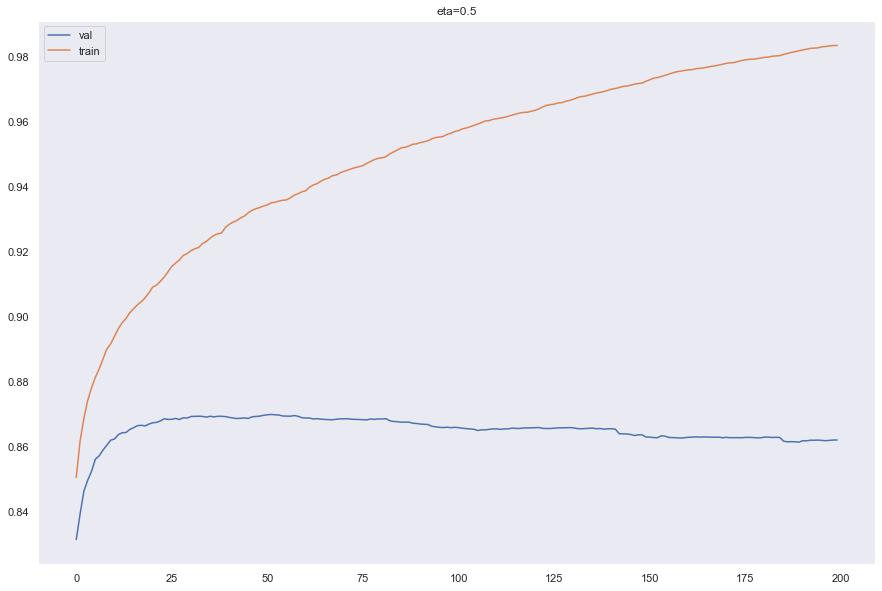

In [432]:
etas = ['eta=0.1', 'eta=0.3', 'eta=0.5']

for eta in etas:
    df_score = scores_eta[eta]
    
    plt.figure(figsize=(15, 10))
    plt.title(eta)
    plt.plot(df_score.num_iter, df_score.val_auc, label='val')
    plt.plot(df_score.num_iter, df_score.train_auc, label='train')
    plt.grid()
    plt.legend()

> Tuning `max_depth` parameter for `XGBoost()`

In [433]:
scores_md = {}

In [440]:
%%capture output
eta = 0.1

xgb_params = {
    'eta': eta, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  evals=watchlist)

In [441]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores_md[key] = parse_xgb_output(output)
scores_md.keys()

dict_keys(['max_depth=1', 'max_depth=3', 'max_depth=6', 'max_depth=10'])

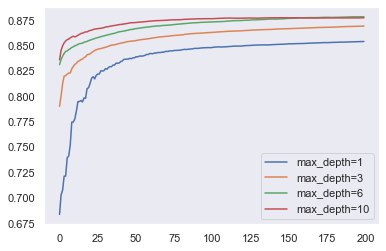

In [442]:
max_dept = ['max_depth=1', 'max_depth=3', 'max_depth=6', 'max_depth=10']

for d in max_dept:
    df_score = scores_md[d]
    
    plt.plot(df_score.num_iter, df_score.val_auc, label=d)
    
plt.grid()
plt.legend()

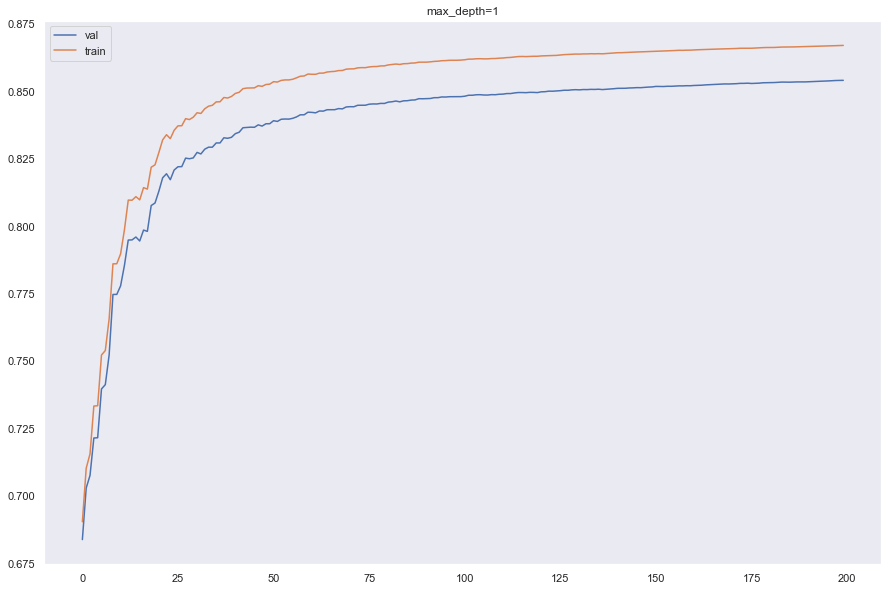

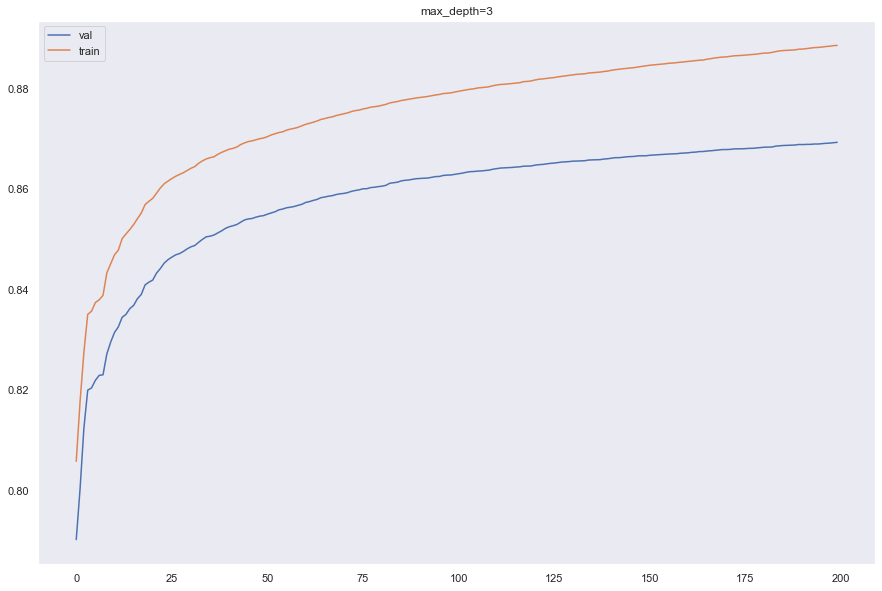

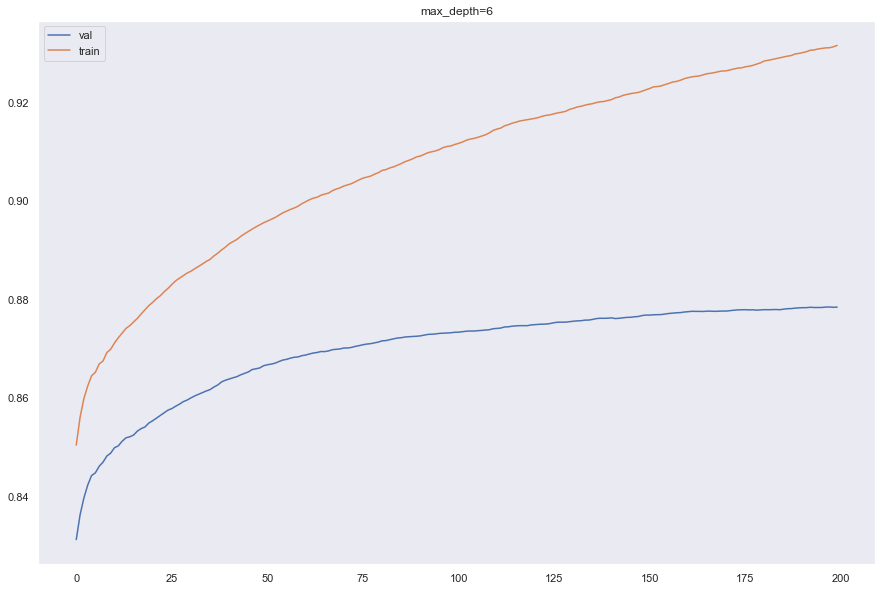

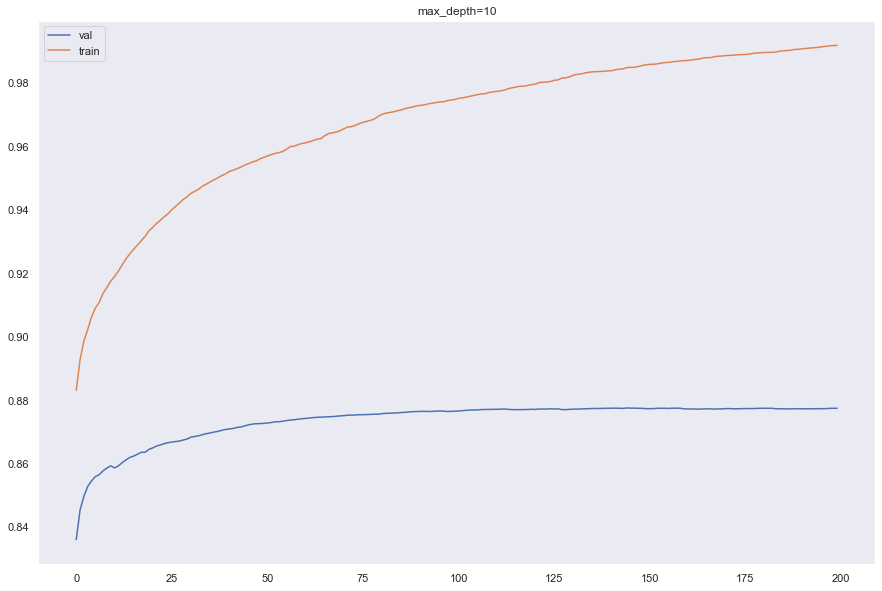

In [443]:
for d in max_dept:
    df_score = scores_md[d]
    
    plt.figure(figsize=(15, 10))
    plt.title(d)
    plt.plot(df_score.num_iter, df_score.val_auc, label='val')
    plt.plot(df_score.num_iter, df_score.train_auc, label='train')
    plt.grid()
    plt.legend()

> Tuning `min_child_weight` parameter for `XGBoost()`

In [446]:
scores_mcw = {}

In [452]:
%%capture output
eta = 0.1
d = 6

xgb_params = {
    'eta': eta, 
    'max_depth': d,
    'min_child_weight': 20,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  evals=watchlist)

In [453]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores_mcw[key] = parse_xgb_output(output)
scores_mcw.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=5', 'min_child_weight=10', 'min_child_weight=20'])

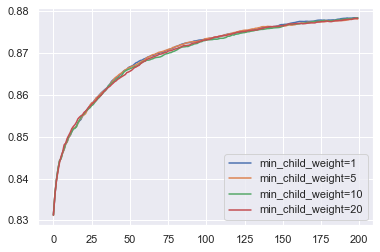

In [454]:
mcw = ['min_child_weight=1', 'min_child_weight=5','min_child_weight=10',
       'min_child_weight=20']

for w in mcw:
    df_score = scores_mcw[w]
    
    plt.plot(df_score.num_iter, df_score.val_auc, label=w)
    plt.grid()
    plt.legend()

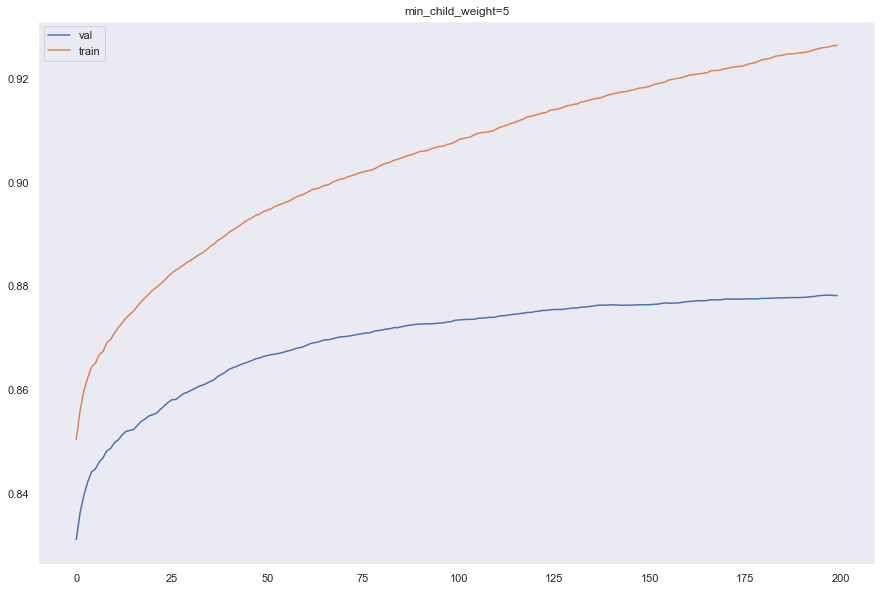

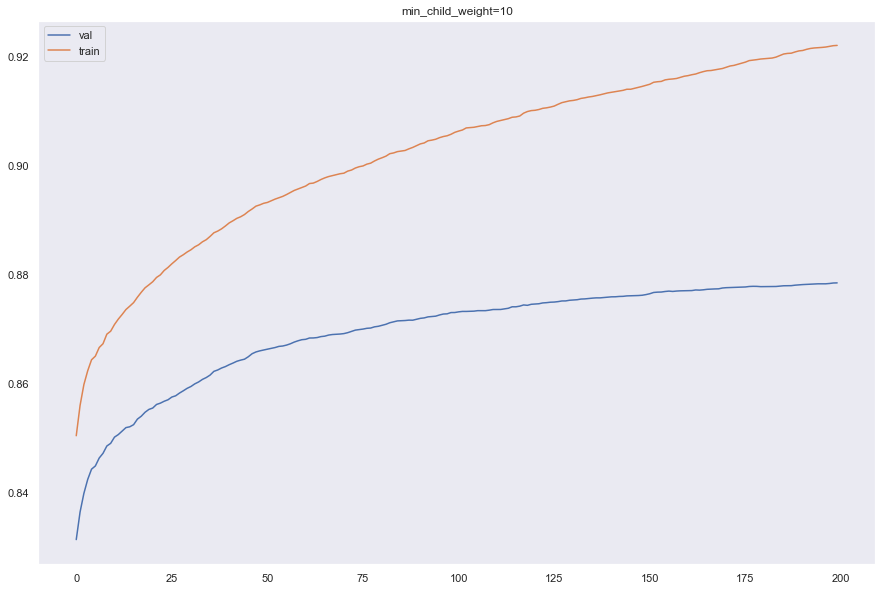

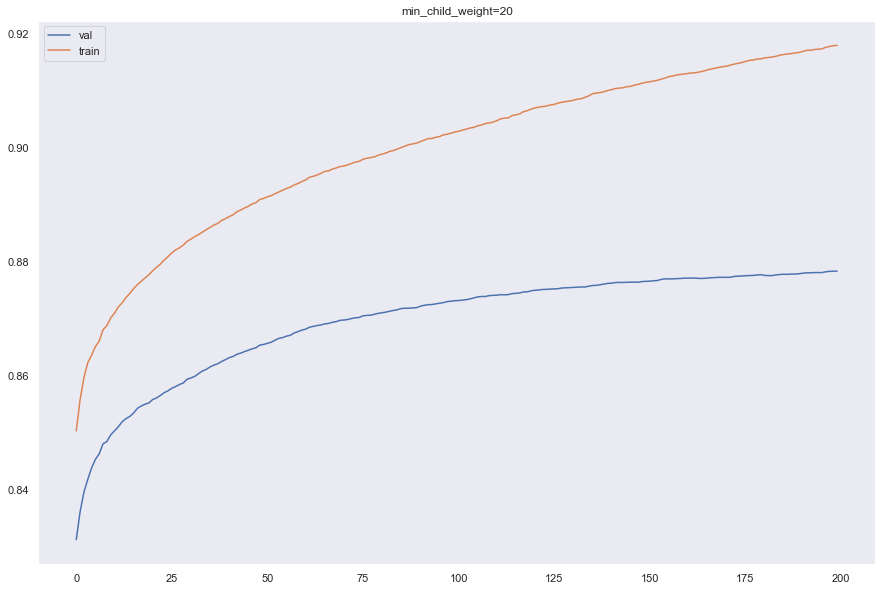

In [455]:
mcw = ['min_child_weight=5', 'min_child_weight=10',
       'min_child_weight=20']
for w in mcw:
    df_score = scores_mcw[w]
    
    plt.figure(figsize=(15, 10))
    plt.title(w)
    plt.plot(df_score.num_iter, df_score.val_auc, label='val')
    plt.plot(df_score.num_iter, df_score.train_auc, label='train')
    plt.grid()
    plt.legend()

From all of the tuning above it can be conluded that:
* `eta` = 0.1
* `max_depth` = 6
* `min_child_weight` = 1  

Gives the best model performance. Therefore, those parameter choose to be the final values of XGBoost model parameter.

## **Train the best and final model**
---
### Choose final model

In [456]:
C = 0.1
model_1 = LogisticRegression(solver='liblinear', C=C, max_iter=1000)

In [457]:
depth = 10
s = 200
model_2 = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)

In [458]:
max_depth = 20
r = 10
s = 1
f = 20
n = 200
model_3 = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    max_features=f,
                                    min_samples_leaf=s,
                                    random_state=1, n_jobs=-1)

In [459]:
eta = 0.1
d = 6
w = 1

xgb_params = {
    'eta': eta, 
    'max_depth': d,
    'min_child_weight': w,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    }

model_4 = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  evals=watchlist)

[0]	train-auc:0.85040	val-auc:0.83125
[1]	train-auc:0.85605	val-auc:0.83626
[2]	train-auc:0.85985	val-auc:0.83969
[3]	train-auc:0.86240	val-auc:0.84230
[4]	train-auc:0.86446	val-auc:0.84423
[5]	train-auc:0.86518	val-auc:0.84479
[6]	train-auc:0.86688	val-auc:0.84612
[7]	train-auc:0.86746	val-auc:0.84695
[8]	train-auc:0.86918	val-auc:0.84820
[9]	train-auc:0.86985	val-auc:0.84878
[10]	train-auc:0.87112	val-auc:0.84988
[11]	train-auc:0.87219	val-auc:0.85026
[12]	train-auc:0.87312	val-auc:0.85119
[13]	train-auc:0.87407	val-auc:0.85189
[14]	train-auc:0.87464	val-auc:0.85210
[15]	train-auc:0.87538	val-auc:0.85246
[16]	train-auc:0.87613	val-auc:0.85326
[17]	train-auc:0.87703	val-auc:0.85377
[18]	train-auc:0.87788	val-auc:0.85411
[19]	train-auc:0.87872	val-auc:0.85490
[20]	train-auc:0.87937	val-auc:0.85536
[21]	train-auc:0.88012	val-auc:0.85590
[22]	train-auc:0.88072	val-auc:0.85642
[23]	train-auc:0.88152	val-auc:0.85700
[24]	train-auc:0.88220	val-auc:0.85751
[25]	train-auc:0.88300	val-auc:0.85

In [460]:
model = [model_1, model_2, model_3, model_4]
name = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
q = 0
auc_score = []
for m in model:
    mod = m
    if mod == model_4:
        y_pred = mod.predict(dval)
        auc = roc_auc_score(y_val, y_pred)
    else:
        mod.fit(X_train, y_train)
        y_pred = mod.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
    
    auc_score.append((name[q], auc.round(3)))    
    q = q+1

In [461]:
columns = ['Model', 'AUC_scores']
df_scores = pd.DataFrame(auc_score, columns=columns)
df_scores

,Model,AUC_scores
0,Logistic Regression,0.862
1,Decision Tree,0.843
2,Random Forest,0.868
3,XGBoost,0.878


From all of the model that have been trained, it's shows that `XGBoost` model gives the best performances from the AUC scores on validation dataset. Therefore, the final model that I will use in this capstone project is `XGBoost` model.

### Train Best Model

In [462]:
dv = DictVectorizer(sparse=False)

X_col = categorical+numerical 

X_full_train = OHE_DV(df_full_train, dv, X_col)
X_test = OHE_DV_wo_fit(df_test, dv, X_col)

X_full_train.shape, X_test.shape

((116368, 129), (29092, 129))

In [463]:
features = dv.get_feature_names()
dfull_train = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=features)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)

In [464]:
eta = 0.1
d = 6
w = 1

xgb_params = {
    'eta': eta, 
    'max_depth': d,
    'min_child_weight': w,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    }

model_final = xgb.train(xgb_params, dfull_train, num_boost_round=200)

In [465]:
model = model_final

y_pred = model.predict(dtest)
auc = roc_auc_score(y_test, y_pred)
print(f'Final Model = {name[3]} -> AUC Score = {auc.round(3)}')

Final Model = XGBoost -> AUC Score = 0.877
